# TITULO TFM  

* Autora:
* Fecha:

## Datos

El conjunto de datos utilizado en este notebook es un conjunto de datos público disponible en el repositorio de datos de  Mendeley <a href='#data'>[1]</a>. Este conjunto de datos pertenece a un estudio realizado en el Centro Médico Universitario de Liubliana, Eslovenia <a href='#paper'>[2]</a>.  

El dataset contiene información extraída de embarazadas en la 24-37 semana de gestación. En concreto, se recogen 22 carácterísticas:

* <code>Patient number</code>: identificador
* <code>Maternal age</code>: Edad de la madre
* <code>Parity</code>: número de veces que ha dado a luz (**Nota**: las mujeres que dieron a luz por primera vez en el estudio se consideron con el valor 1, ya que se recogieron datos hasta el momento del parto). 
* <code>Pre-pregnancy weight </code>: Peso antes del embarazo (en kilos)
* <code>Maternal height</code>: Altura embarazada (en metros)
* <code>BMI before pregnanciy</code>: Índice de masa corporal antes del embarazo
* <code>Art ut. D-resistance index [RI]</code>: Índice de resistencia de la arteria uterina derecha
* <code>Art ut. L-resistance index [RI]</code>: Índice de resistencia de la arteria uterina izquierda
* <code>Mean RI</code>: Índice de resistencia medio
* <code>Art ut. D-pulsatility index [PI]</code>: Índice de pulsatilidad de la arteria uterina derecha
* <code>Art ut. L-pulsatility index [PI]</code>: Índice de pulsatilidad de la arteria uterina izquierda
* <code>Mean PI</code>: Índice de pulsatilidad medio
* <code>Velocidad sistólica pico de la arteria uterina derecha</code>: Número decimal
* <code>Art ut. L-Peak Systolic Velocity [PSV]</code>: Velocidad sistólica pico de la arteria uterina izquierda
* <code>Mean PSV</code>: Velocidad sistólica pico media
* <code>Bilateral notch</code>: Presencia o ausencia de una escotadura protodiastólica (notch). El valor puede ser 1 si es unilateral, 2 si es bilateral y 0 si no hay ningún *notch*.
* <code>Gestational age at delivery</code>: Edad gestacional en el momento del parto (en semanas). 
* <code>Weight</code>: Peso del neonato (en gramos)
* <code>S-Flt1 </code>: Niveles séricos de la tirosina quinasa 1 soluble similar a fms (sFlt-1). Unidad: µg/L
* <code>S-PLGF </code>: Factor de crecimiento placentario. Unidad: µg/L
* <code>sFLT/PLGF</code>: Ratio
* <code>class</code>: Clase. Puede ser: control (embarazadas sin ningún tipo de trastorno relacionado con la disfunción placentaria), PE (preemclampsia), IUGR (restricción del crecimiento intrauterino) y PE-IUGR (padece ambas enfermedades).

El objetivo es obtener un modelo capaz de predecir los trastornos relacionados con la disfunción placentaria (en inglés, *Placental Dysfunction–related Disorders*), en concreto preeclampsia y la restricción del crecimiento intrauterino. 




## Lecturas de datos  
No podemos cargar directamente el excel descargado con los datos porque posse una triple cabecera. Vamos a saltar las tres primeras filas del dataset a la hora de cargar los datos. Tras esto, podremos cargar los datos sin problemas con Pandas
 

In [1502]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split

In [1503]:
data= pd.read_excel("data/Raw_data.xlsx", skiprows= lambda x: x in [0, 1])
data.columns= ["class","ID","age", "weight", "height", "BMI", "R-RI", "R-PI", "R-PSV", "L-RI", 
                         "L-PI", "L-PSV", "meanRI", "meanPI", "meanPSV", "notch", "age_delivery", 
                         "parity", "birth_weight", "S-Flt1", "S-PLGF", "ratio_F_P"]

In [1504]:
data.head(10)

,class,ID,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,...,meanRI,meanPI,meanPSV,notch,age_delivery,parity,birth_weight,S-Flt1,S-PLGF,ratio_F_P
0,Control,2 DM,37.0,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,...,0.460,0.580,59.60,0.0,37.285714,1.0,3060,11511.0,102.8,111.974708
1,Control,650387,35.0,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,...,0.535,0.635,67.70,0.0,36.714286,3.0,2780,3146.0,752.8,4.179065
2,Control,650394,34.0,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,...,0.470,0.610,61.00,0.0,35.142857,1.0,2450,3858.0,203.2,18.986220
3,Control,678474,31.0,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,...,0.620,0.980,64.80,0.0,36.428571,2.0,2490,995.0,1051.0,0.946717
4,Control,653633,31.0,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,...,0.605,0.820,58.60,0.0,32.142857,1.0,1905,1667.0,1440.0,1.157639
5,Control,688875,33.0,55.0,1.67,19.721037,0.68,0.68,55.3,0.66,...,0.670,0.625,58.30,0.0,34.000000,1.0,2180,5444.0,736.1,7.395734
6,Control,698789,27.0,76.0,1.73,25.393431,0.43,0.60,59.7,0.51,...,0.470,0.640,61.95,0.0,34.428571,1.0,1910,3412.0,1410.0,2.419858
7,Control,698795,35.0,53.0,1.63,19.948060,0.71,0.83,60.5,0.77,...,0.740,1.105,59.80,0.0,37.142857,1.0,2600,3403.0,723.8,4.701575
8,Control,698794,26.0,55.0,1.73,18.376825,0.54,0.65,64.7,0.55,...,0.545,0.660,62.45,0.0,39.285714,1.0,3110,2989.0,1111.0,2.690369
9,Control,698798,32.0,49.0,1.64,18.218322,0.51,0.67,57.1,0.57,...,0.540,0.690,58.25,0.0,31.857143,2.0,1510,2441.0,361.3,6.756158


In [1505]:
data.shape

(99, 22)

Algunas de las columnas del dataframe no se van a utilizar para este problema de clasificación. Estas columnas son:  
* <code>ID</code>: número identificador de paciente.
* <code>Age_delivery</code>: representa la edad gestacional, es decir, el número de semanas de la embarazada en el momento de dar a luz. 
* <code>Birth_weight</code>: peso del bebe al nacer.

Estos dos últimos atributos son datos que se conocen a término del embarazo, por lo tanto no se podría utilizar para detectar riesgos durante el embarazo ya que no dispondríamos aún de estos datos.

Por ello, se van a eliminar dichas columnas del dataset.

In [1506]:
data.drop(['ID', 'age_delivery', 'birth_weight'], axis=1, inplace=True)

In [1507]:
data.columns

Index(['class', 'age', 'weight', 'height', 'BMI', 'R-RI', 'R-PI', 'R-PSV',
       'L-RI', 'L-PI', 'L-PSV', 'meanRI', 'meanPI', 'meanPSV', 'notch',
       'parity', 'S-Flt1', 'S-PLGF', 'ratio_F_P'],
      dtype='object')

In [1508]:
data.reset_index(inplace=True, drop=True)

## Análisis Exploratorio

In [1509]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

### Tipo de variables

Vamos a estudiar qué tipos de variables tenemos en el dataset. 

In [1510]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   class      95 non-null     object 
 1   age        95 non-null     float64
 2   weight     94 non-null     float64
 3   height     94 non-null     float64
 4   BMI        92 non-null     float64
 5   R-RI       95 non-null     float64
 6   R-PI       95 non-null     float64
 7   R-PSV      95 non-null     float64
 8   L-RI       95 non-null     float64
 9   L-PI       95 non-null     float64
 10  L-PSV      95 non-null     float64
 11  meanRI     99 non-null     float64
 12  meanPI     99 non-null     float64
 13  meanPSV    93 non-null     float64
 14  notch      95 non-null     float64
 15  parity     95 non-null     float64
 16  S-Flt1     99 non-null     float64
 17  S-PLGF     99 non-null     float64
 18  ratio_F_P  99 non-null     float64
dtypes: float64(18), object(1)
memory usage: 14.8+ KB


### Número de observaciones y valores ausentes

In [1511]:
data.shape

(99, 19)

Como se puede observar, está compuesto por 19 atributos (columnas) y 99 instancias (filas). Vamos a comprobar si existen filas duplicadas.

In [1512]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 19)


No existen filas duplicadas. Ahora comprobamos el número de valores nulos para cada columna.

In [1513]:
data.isnull().sum()

class        4
age          4
weight       5
height       5
BMI          7
R-RI         4
R-PI         4
R-PSV        4
L-RI         4
L-PI         4
L-PSV        4
meanRI       0
meanPI       0
meanPSV      6
notch        4
parity       4
S-Flt1       0
S-PLGF       0
ratio_F_P    0
dtype: int64

Existen valores nulos en las columnas <code>weight</code>, <code>height</code>, <code>BMI</code> y <code>meanPSV</code>. Veámos las filas que contienen valores nulos.

In [1514]:
data[data['class'].isnull()]

,class,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,notch,parity,S-Flt1,S-PLGF,ratio_F_P
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.568103,0.698448,NaN,NaN,NaN,3498.620690,648.940690,13.197129
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708125,1.371719,NaN,NaN,NaN,19948.625000,124.384375,407.334090
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.724583,1.395833,NaN,NaN,NaN,8872.083333,120.595000,230.745479
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.635000,0.999318,NaN,NaN,NaN,18343.545455,205.533182,314.132643


In [1515]:
data= data.drop(index=[29,62,75,98], axis=0)
data[data['class'].isnull()]

,class,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,notch,parity,S-Flt1,S-PLGF,ratio_F_P


In [1516]:
nulos = data[data.isnull().any(1)]

In [1517]:
nulos

,class,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,notch,parity,S-Flt1,S-PLGF,ratio_F_P
59,IUGR+PE,43.0,66.0,1.52,NaN,0.63,0.60,67.4,0.59,0.67,62.9,0.610,0.635,65.15,0.0,1.0,27390.0,153.60,178.320312
60,IUGR+PE,36.0,52.0,1.64,NaN,0.67,0.81,57.9,0.69,0.89,61.4,0.680,0.850,59.65,1.0,1.0,29805.0,79.73,373.824157
63,IUGR,26.0,NaN,NaN,NaN,0.84,2.02,68.8,0.83,2.28,59.4,0.835,2.150,64.10,1.0,1.0,10015.0,42.64,234.873358
96,PE,30.0,53.0,1.57,21.501886,0.49,0.52,60.4,0.51,0.56,58.1,0.500,0.540,NaN,0.0,1.0,10535.0,34.97,301.258221
97,PE,26.0,74.0,1.65,27.180900,0.69,0.62,54.9,0.73,0.71,60.5,0.710,0.665,NaN,2.0,1.0,12154.0,15.84,767.297980


Vemos que en las filas 58 y 59 falta el valor de la columna <code>BMI</code>. El <code>BMI</code> indica el índice masa corporal, que se calcula dividiendo el peso (en kilogramos) entre la altura (en metros) al cuadrado. Estos dos valores ausentes pueden ser calculados usando las columnas <code>weight</code> y <code>height</code>.
En la columna 61, falta tanto el <code>BMI</code> como <code>weight</code> y <code>height</code>. Para las columnas <code>weight</code> y <code>height</code>, calcularemos el valor medio de cada columna y lo sustituiremos por el valor nulo. En cuanto el valor ausente del <code>BMI</code>, haremos como en el primer caso y lo sustituiremos por el valor de <code>weight</code> dividido entre el valor de <code>height</code> al cuadrado correspondiente.  
Por último, en la fila 93 y 94 tienen ausente el valor de <code>meanPSV</code>. El valor de esta columna corresponde con el valor medio de las columnas <code>R-PSV</code> y <code>L-PSV</code>. Calcularemos este valor medio para sustituir al valor NaN.

In [1518]:
var_nan=['weight', "height", "BMI", "meanPSV"]

### Clase

En este apartado, vamos a estudiar la clase del dataset.

In [1519]:
data["class"].unique()

array(['Control', 'IUGR+PE', 'IUGR', 'PE'], dtype=object)

In [1520]:
data["class"].value_counts()

IUGR+PE    32
Control    29
PE         22
IUGR       12
Name: class, dtype: int64

La clase puede tener cuatro valores distintos: *Control, IUGR_PE, IUGR y PE*. Por lo tanto, nos encontramos frente a un problema de clasificación multiclase. 

| Valor | Descripción |Número de pacientes|
| :- | :- | :- |
| IUGR_PE | Preeclampsia con retraso de crecimiento intrauterino  | 32 |
| Control| No padece ninguna de las dos enfermedades | 29 |
| PE    | Preeclampsia | 22 |
| IUGR    | Retraso de crecimiento intrauterino | 12 |

Visualicemos cómo sería la distribución de la clase.

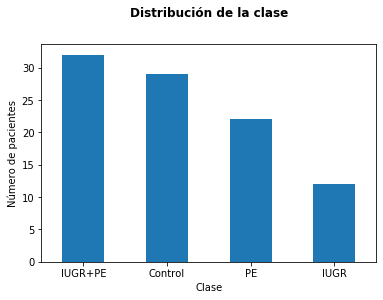

In [1521]:
frecuencias = data["class"].value_counts()
fig, ax = plt.subplots()
frecuencias.plot(kind='bar')
plt.title("Distribución de la clase",fontweight = "bold" , fontsize = 12, y=1.1)
plt.xlabel("Clase" )
plt.ylabel("Número de pacientes")
ax.tick_params( labelrotation=0)

Vemos que la clase se encuentra desbalanceada (sobre todo para el valor IUGR).  

Como se ha comentado, es difícil diferenciar IUGR y PE **EXPLICAR MEJOR**  
# WARNING CAMBIAR
Vamos a considerar el problema de clasificación en un problema binario, en el que vamos a evaluar la probabilidad de posser o no un trastorno relacionado con la disfunción placentaria.

In [1522]:
aux= data['class'].copy()
aux = pd.DataFrame(aux)

In [1523]:
aux.loc[aux['class'] =="PE", 'PE'] = 1
aux.loc[aux['class'] =="IUGR+PE", 'PE'] = 1
aux.loc[aux['class'] =="Control", 'PE'] = 0
aux.loc[aux['class'] =="IUGR", 'PE'] = 0

aux.loc[aux['class'] =="PE", 'IUGR'] = 0
aux.loc[aux['class'] =="IUGR+PE", 'IUGR'] = 1
aux.loc[aux['class'] =="Control", 'IUGR'] = 0
aux.loc[aux['class'] =="IUGR", 'IUGR'] = 1

In [1524]:
aux['PE'] = aux['class'].apply(lambda x: 1 if (x =="PE" or x=="IUGR+PE") else 0)
aux['IUGR'] = aux['class'].apply(lambda x: 1 if (x =="IUGR" or x=="IUGR+PE") else 0)

In [1525]:
aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   95 non-null     object
 1   PE      95 non-null     int64 
 2   IUGR    95 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 3.0+ KB


In [1526]:
aux.loc[[1,40, 63,76]]

,class,PE,IUGR
1,Control,0,0
40,IUGR+PE,1,1
63,IUGR,0,1
76,PE,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD1AE80848>,
      dtype=object)

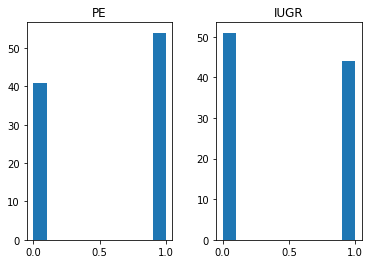

In [1527]:

aux[["PE","IUGR"]].hist(grid=False)


In [1528]:
print("Número de control:", aux[(aux["PE"]==0) & (aux["IUGR"]==0)]["PE"].count())
print("Número de PE:", aux[(aux["PE"]==1) & (aux["IUGR"]==0)]["PE"].count())
print("Número de IUGR:", aux[(aux["PE"]==0) & (aux["IUGR"]==1)]["PE"].count())
print("Número de IUGR+PE:", aux[(aux["PE"]==1) & (aux["IUGR"]==1)]["PE"].count())

Número de control: 29
Número de PE: 22
Número de IUGR: 12
Número de IUGR+PE: 32


### Variables numéricas

In [1529]:
data.describe()

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,notch,parity,S-Flt1,S-PLGF,ratio_F_P
count,95.000000,94.000000,94.000000,92.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.00000,93.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,32.147368,67.531915,1.655638,24.616912,0.639474,1.063158,60.809053,0.655895,1.102842,61.128000,0.647684,1.08300,61.022151,0.600000,1.536842,13156.200000,302.825789,243.129174
std,5.084328,14.354724,0.062554,4.800613,0.126444,0.501891,6.709441,0.108437,0.470865,6.076082,0.112455,0.47324,5.705277,0.674773,0.920344,13824.935398,383.390465,351.790952
min,21.000000,46.000000,1.500000,17.102915,0.400000,0.450000,47.800000,0.430000,0.520000,46.800000,0.420000,0.54000,50.200000,0.000000,1.000000,995.000000,10.050000,0.946717
25%,29.000000,58.000000,1.620000,21.441041,0.560000,0.645000,56.700000,0.590000,0.695000,57.800000,0.570000,0.67000,57.600000,0.000000,1.000000,3623.500000,54.020000,7.367625
50%,32.000000,65.000000,1.660000,23.529412,0.670000,0.870000,59.100000,0.670000,0.890000,60.200000,0.670000,0.93500,60.200000,0.000000,1.000000,9530.000000,105.900000,119.728305
75%,36.000000,74.000000,1.700000,26.241408,0.735000,1.485000,63.250000,0.755000,1.530000,64.100000,0.750000,1.46750,62.450000,1.000000,2.000000,17947.000000,448.550000,362.884861
max,47.000000,113.000000,1.800000,39.682540,0.840000,2.490000,89.800000,0.830000,2.280000,89.800000,0.835000,2.21500,88.650000,2.000000,6.000000,74283.000000,1607.000000,2297.421203


El dataset presenta distintos rangos entre sus atributos (por ejemplo, la columna L-RI tiene un valor medio de 0,655895, mientras que el valor medio de S-Plt1 es 13156,2)

In [1530]:
columnas_numeric = data.select_dtypes(include=['float64']).columns
len(columnas_numeric)

18

Veamos la distribución de cada atributo numérico.

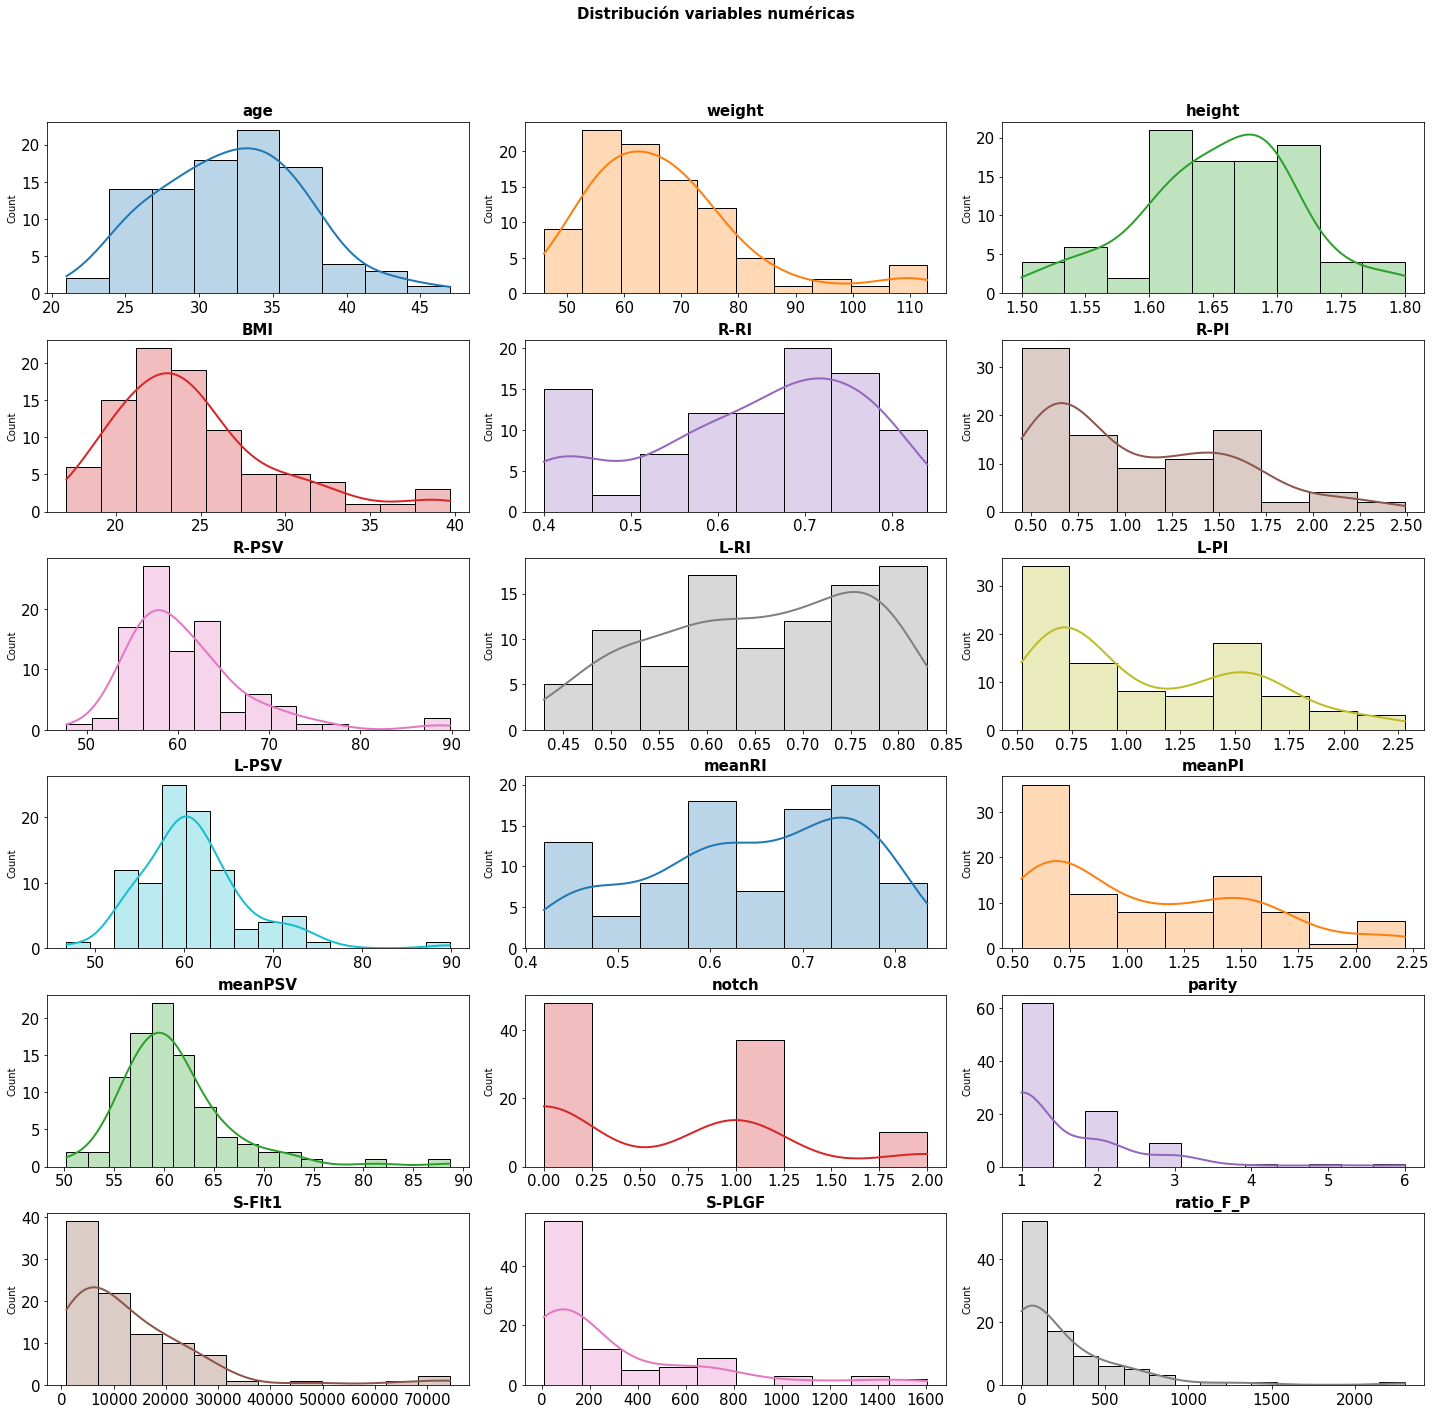

In [1531]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 15)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 15, fontweight = "bold");

Las variables <code>parity</code> y <code>biltateralNotch</code> toman muy pocos valores.

In [1532]:
print("Parity:")
print(data['parity'].value_counts())
print("--------------------------------")
print("Notch: ")
print(data['notch'].value_counts())

Parity:
1.0    62
2.0    21
3.0     9
4.0     1
5.0     1
6.0     1
Name: parity, dtype: int64
--------------------------------
Notch: 
0.0    48
1.0    37
2.0    10
Name: notch, dtype: int64


In [1533]:
pd.DataFrame(data['parity'].value_counts())

,parity
1.0,62
2.0,21
3.0,9
4.0,1
5.0,1
6.0,1


Vamos a considerarlas de tipo categórico a partir de ahora.

In [1534]:
data['parity'] = data['parity'].astype('O')
data['notch'] = data['notch'].astype('O')

Respecto al resto de distribuciones numéricas, vamos a ver de qué tipo son: normales o asimétricas. Podemos determinar esto usando el test de Shapiro-Wilks. Este test plantea como hipótesis nula que los datos son una muestra de una distribución normal. Un p-valor inferior a 0.05 (confianza del 95%) indicará que la distribución de datos no es normal.

In [1535]:
resp = data.select_dtypes(include=['float64']).columns

skew= pd.DataFrame(columns=["Feature", "p-value"])
skew

,Feature,p-value


In [1536]:
for i in resp:
    p_value=shapiro(data[i])[1]
    skew=skew.append({"Feature": i, "p-value":p_value}, ignore_index=True)

In [1537]:
skewed=skew[skew["p-value"]<0.05]
skewed.sort_values("p-value",ascending=True)

,Feature,p-value
15,ratio_F_P,7.573866e-13
13,S-Flt1,6.484138e-12
14,S-PLGF,8.077696e-12
6,R-PSV,5.040247e-08
8,L-PI,4.421298e-07
11,meanPI,9.603907e-07
5,R-PI,1.621203e-06
9,L-PSV,9.295508e-06
4,R-RI,3.834041e-05
10,meanRI,2.771516e-04


In [1538]:
skewed_data= skewed["Feature"].unique()
print("Distribuciones asimétricas")
print(skewed_data)

Distribuciones asimétricas
['R-RI' 'R-PI' 'R-PSV' 'L-RI' 'L-PI' 'L-PSV' 'meanRI' 'meanPI' 'S-Flt1'
 'S-PLGF' 'ratio_F_P']


In [1539]:
normal=skew[skew["p-value"]>0.05]
normal_data=normal["Feature"].unique()
print("Distribuciones normales")
print(normal_data)

Distribuciones normales
['age' 'weight' 'height' 'BMI' 'meanPSV']


In [1540]:
d_log= np.log(data[skewed_data])

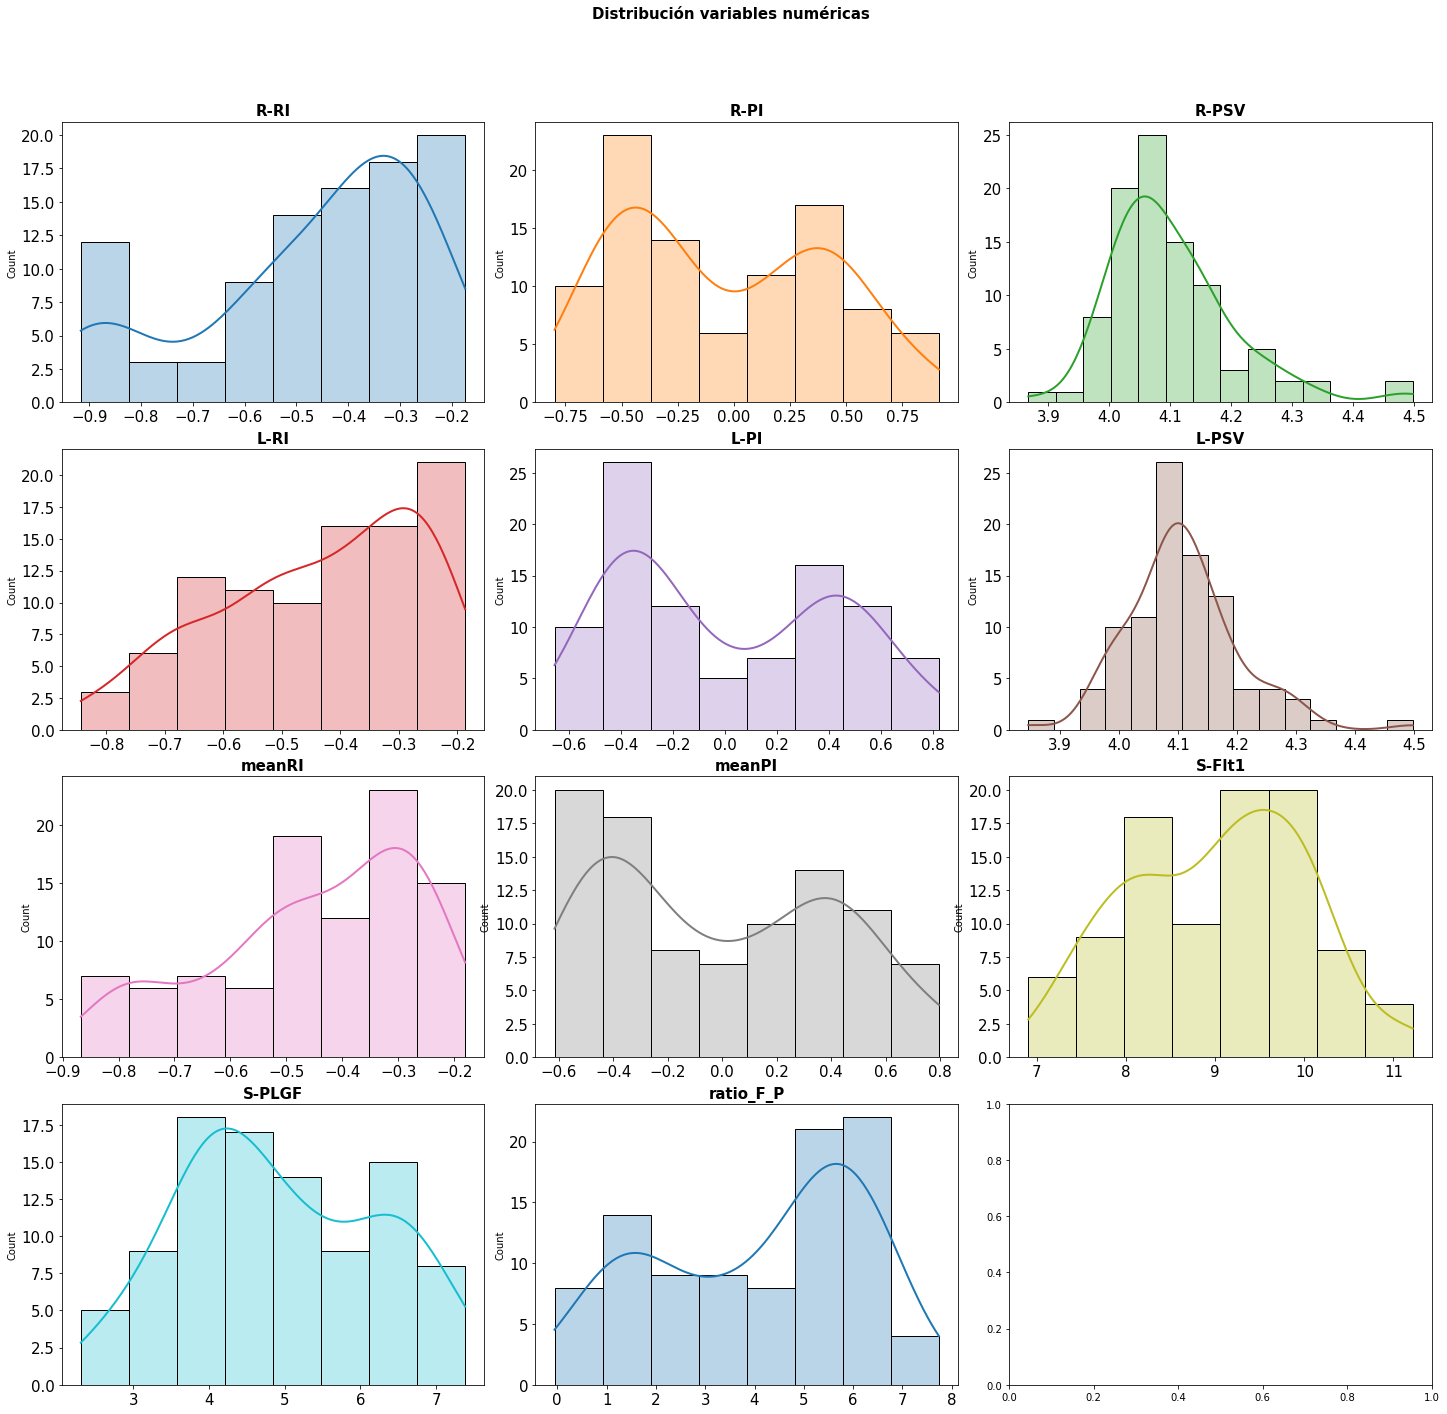

In [1541]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64']).columns

for i, colum in enumerate(skewed_data):
    sns.histplot(
        data    = d_log,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 15)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 15, fontweight = "bold");

In [1542]:
data.select_dtypes(include="float").columns

Index(['age', 'weight', 'height', 'BMI', 'R-RI', 'R-PI', 'R-PSV', 'L-RI',
       'L-PI', 'L-PSV', 'meanRI', 'meanPI', 'meanPSV', 'S-Flt1', 'S-PLGF',
       'ratio_F_P'],
      dtype='object')

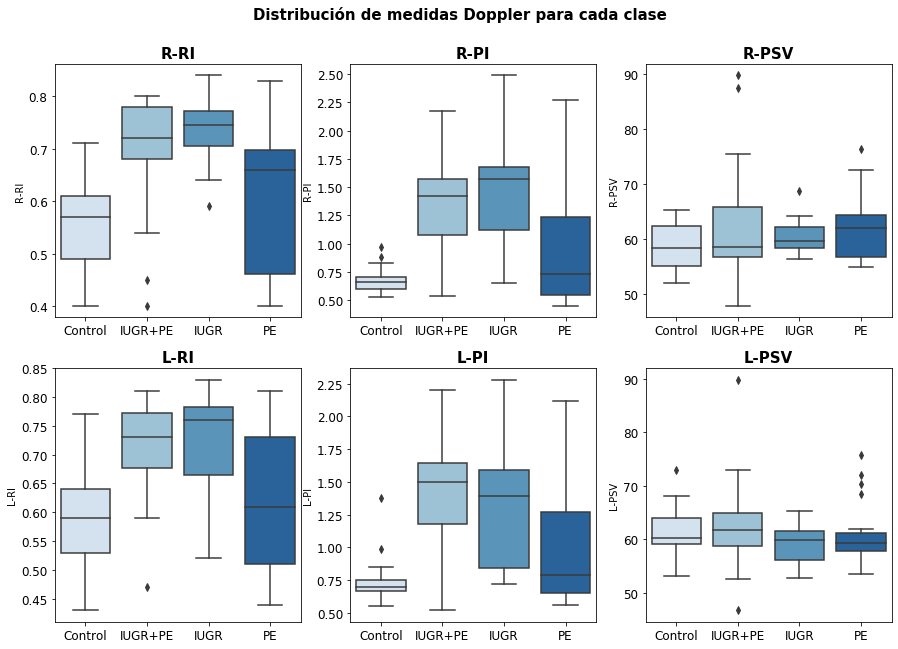

In [1543]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flat
medidas_doppler= ['R-RI', 'R-PI', 'R-PSV', 'L-RI','L-PI', 'L-PSV']

for i, var in enumerate(medidas_doppler):
    sns.boxplot(x='class', y=var, data=data, ax= axes[i], palette="Blues")
    axes[i].set_title(var, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 12)
    axes[i].set_xlabel("")

plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de medidas Doppler para cada clase', fontsize = 15, fontweight = "bold");

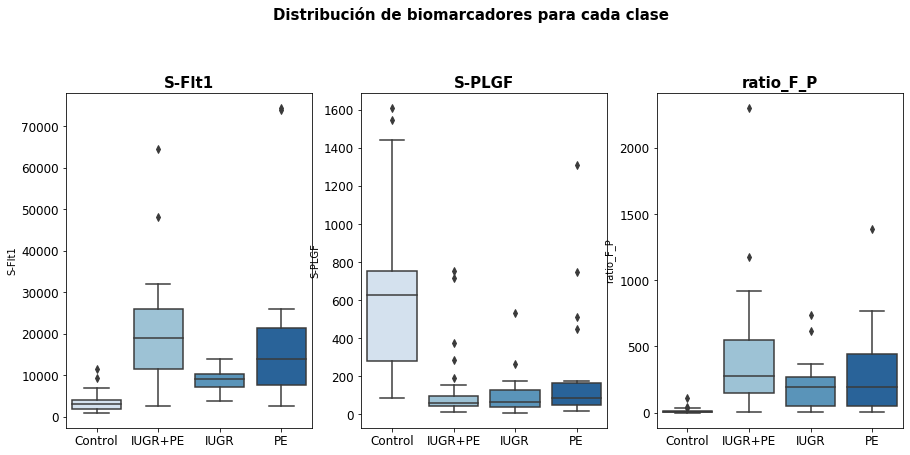

In [1544]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axes = axes.flat
biomarcadores= ['S-Flt1', 'S-PLGF','ratio_F_P']

for i, var in enumerate(biomarcadores):
    sns.boxplot(x='class', y=var, data=data, ax= axes[i], palette="Blues")
    axes[i].set_title(var, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 12)
    axes[i].set_xlabel("")


plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de biomarcadores para cada clase', fontsize = 15, fontweight = "bold", y=1.1);

In [1545]:
data.head()

,class,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,notch,parity,S-Flt1,S-PLGF,ratio_F_P
0,Control,37.0,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,0.60,53.9,0.460,0.580,59.6,0.0,1.0,11511.0,102.8,111.974708
1,Control,35.0,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,0.73,72.9,0.535,0.635,67.7,0.0,3.0,3146.0,752.8,4.179065
2,Control,34.0,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,0.62,62.3,0.470,0.610,61.0,0.0,1.0,3858.0,203.2,18.986220
3,Control,31.0,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,0.99,68.1,0.620,0.980,64.8,0.0,2.0,995.0,1051.0,0.946717
4,Control,31.0,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,0.76,59.1,0.605,0.820,58.6,0.0,1.0,1667.0,1440.0,1.157639


### Correlación entre variables numéricas

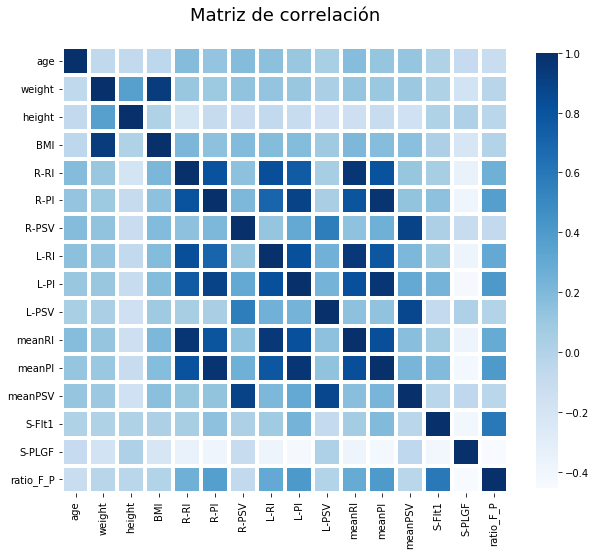

In [1546]:
fig, ax = plt.subplots(figsize=(10, 10))# plot heatmap
corr = data.corr()
graph=sns.heatmap(corr, cmap="Blues", linewidth=3, square= True,cbar_kws={"shrink": .8})

title = 'Matriz de correlación\n'
bottom, top = graph.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(title, fontsize=18)
plt.show()

In [1547]:
corr_matrix = data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

In [1548]:
correlacion =pd.DataFrame(sol, columns=["Correlación"])
correlacion[correlacion["Correlación"]>0.6]

,,Correlación
R-PI,meanPI,0.974681
L-PI,meanPI,0.971184
R-RI,meanRI,0.963732
L-RI,meanRI,0.950348
weight,BMI,0.931485
R-PSV,meanPSV,0.896657
R-PI,L-PI,0.893303
L-PSV,meanPSV,0.873123
R-RI,L-RI,0.832834
meanRI,meanPI,0.830788


Vemos que hay variables númericas altamente correladas. Algunos modelos se ven perjudicados si se incorporan predictores altamente correlacionados. Por ello, sería conveniente eliminar las columnas que contienen información sobre otras columnas (por ejemplo, <code>meanPSV</code> que es el valor medio de <code>R-PSV</code> y <code>L-PSV</code>), ya que no aportan información nueva y podrían introducir ruido.

### Detección de outliers

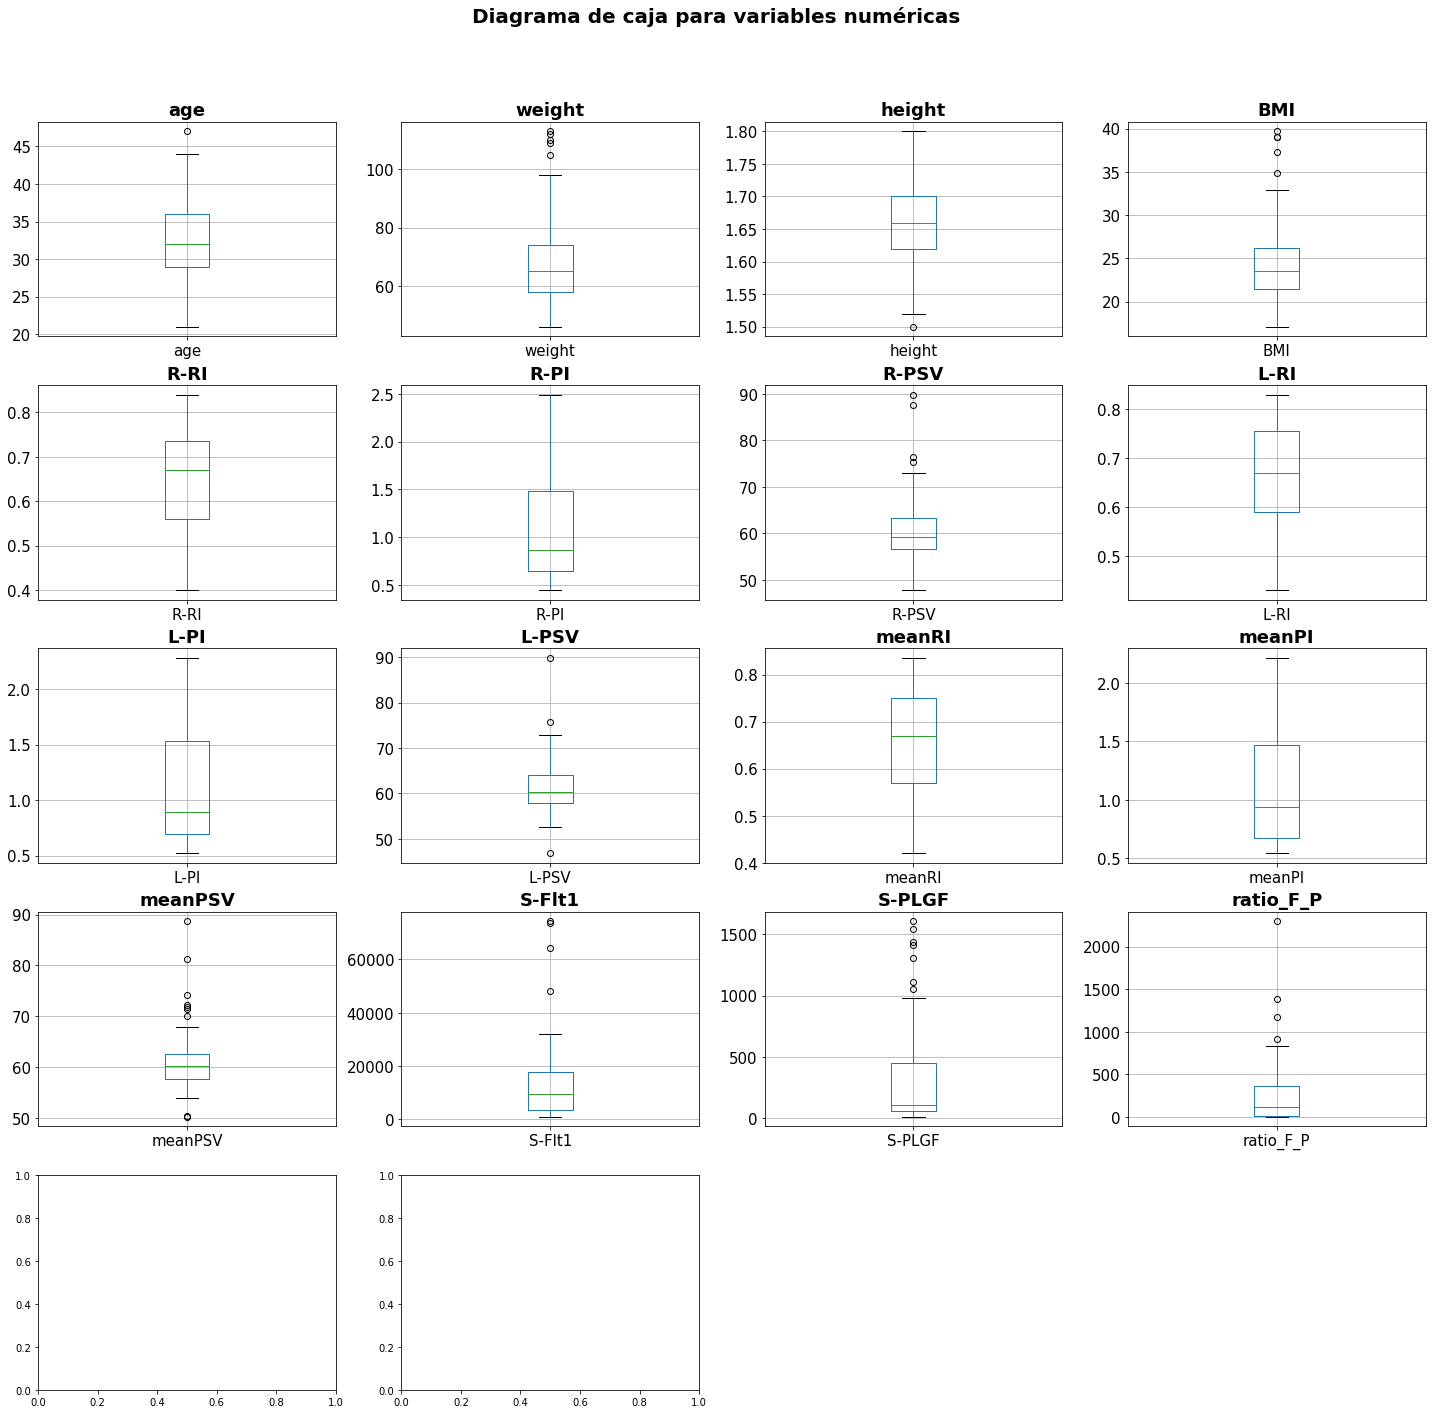

In [1549]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    data.boxplot(
        column  =colum,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 18, fontweight = "bold")
    axes[i].tick_params(labelsize = 15)
    axes[i].set_xlabel("")

axes[18].set_visible(False)
axes[19].set_visible(False)
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Diagrama de caja para variables numéricas', fontsize = 20, fontweight = "bold");

Vemos que algunos atributos poseen outliers. Veamos cuántos outliers tenemos por cada 

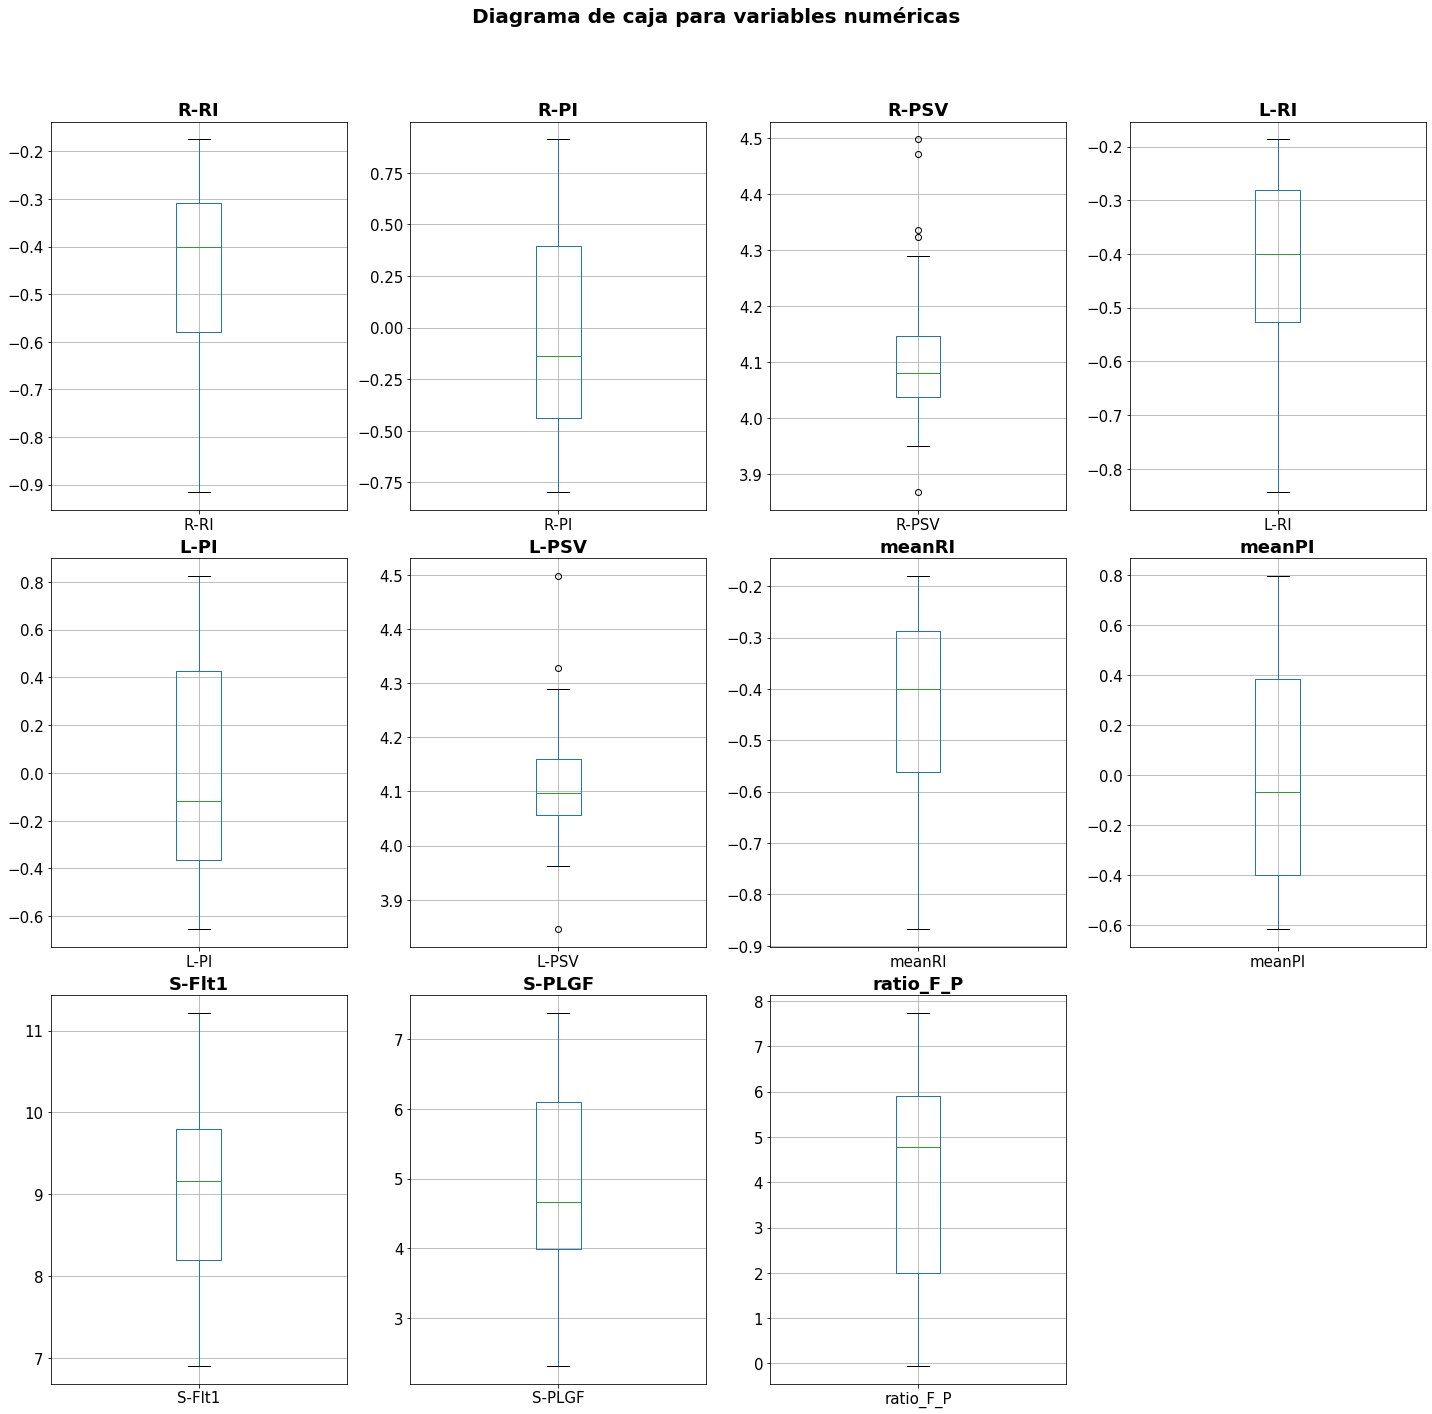

In [1550]:
d_log

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 20))
axes = axes.flat
columnas_numeric = skewed_data

for i, colum in enumerate(columnas_numeric):
    d_log.boxplot(
        column  =colum,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 18, fontweight = "bold")
    axes[i].tick_params(labelsize = 15)
    axes[i].set_xlabel("")


axes[-1].set_visible(False)
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Diagrama de caja para variables numéricas', fontsize = 20, fontweight = "bold");

In [1551]:
min_val = d_log.quantile(0.05)
max_val = d_log.quantile(0.95)
for i in skewed_data:
    out=d_log[(d_log[i]<min_val[i])| (d_log[i]>max_val[i])]
    print("En la columna {} hay {} outliers".format(i, out.shape[0]))
    #print(out)

En la columna R-RI hay 9 outliers
En la columna R-PI hay 10 outliers
En la columna R-PSV hay 10 outliers
En la columna L-RI hay 10 outliers
En la columna L-PI hay 9 outliers
En la columna L-PSV hay 10 outliers
En la columna meanRI hay 10 outliers
En la columna meanPI hay 10 outliers
En la columna S-Flt1 hay 10 outliers
En la columna S-PLGF hay 10 outliers
En la columna ratio_F_P hay 10 outliers


In [1552]:
min_val = data.quantile(0.05)
max_val = data.quantile(0.95)
for i in data.select_dtypes(include=['float64', 'int64']).columns:
    out=data[(data[i]<min_val[i])| (data[i]>max_val[i])]
    print("En la columna {} hay {} outliers".format(i, out.shape[0]))
    #print(out)

En la columna age hay 7 outliers
En la columna weight hay 9 outliers
En la columna height hay 9 outliers
En la columna BMI hay 10 outliers
En la columna R-RI hay 9 outliers
En la columna R-PI hay 10 outliers
En la columna R-PSV hay 10 outliers
En la columna L-RI hay 10 outliers
En la columna L-PI hay 9 outliers
En la columna L-PSV hay 10 outliers
En la columna meanRI hay 10 outliers
En la columna meanPI hay 10 outliers
En la columna meanPSV hay 10 outliers
En la columna S-Flt1 hay 10 outliers
En la columna S-PLGF hay 10 outliers
En la columna ratio_F_P hay 10 outliers


### Variables categóricas

Como variables categóricas, solo tenemos la variable de clase y las dos numéricas que hemos indicado que vamos a tratar como categóricas, <code>parity</code> y <code>bilateralNotch</code>. Veamos estas dos en más profundidad.

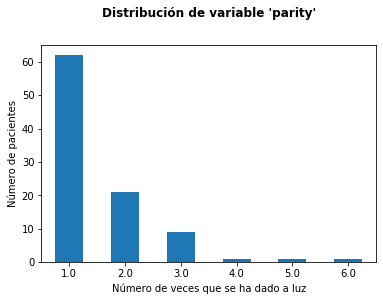

In [1553]:
frecuencias = data["parity"].value_counts()
fig, ax = plt.subplots()
frecuencias.plot(kind='bar')
plt.title("Distribución de variable 'parity'",fontweight = "bold" , fontsize = 12, y=1.1)
plt.xlabel("Número de veces que se ha dado a luz" )
plt.ylabel("Número de pacientes")
ax.tick_params( labelrotation=0)

In [1554]:
pd.DataFrame(data['parity'].value_counts())

,parity
1.0,62
2.0,21
3.0,9
4.0,1
5.0,1
6.0,1


Tenemos 6 posibles etiquetas: 1, 2, 3, 4, 5 y 6. Esta variable representa las veces que se ha dado a luz. Como se indica al principio del notebook, la etiqueta 1 representaría a las madres primerizas.  

Como se puede observar en la gráfica, la gran mayoría de las embarazadas participantes en el estudio son primerizas, teniendo muy poca representación del resto de etiquetas. Los valores de parity para 4, 5, 6 se corresponden con los tres outliers detectados. Lo que vamos a hacer con estos valores es incluirlos en el 0.95.  
  
  **5.2 Quantile based flooring and capping**

**In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value**

In [1555]:
test=data.copy() 
ninetieth_percentile = np.percentile(test['parity'], 90)
ninetieth_percentile

3.0

In [1556]:
test['parity'] = np.where(test['parity']>ninetieth_percentile, ninetieth_percentile, test['parity'])

In [1557]:
test

,class,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,notch,parity,S-Flt1,S-PLGF,ratio_F_P
0,Control,37.0,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,0.60,53.9,0.460,0.580,59.60,0.0,1.0,11511.0,102.80,111.974708
1,Control,35.0,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,0.73,72.9,0.535,0.635,67.70,0.0,3.0,3146.0,752.80,4.179065
2,Control,34.0,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,0.62,62.3,0.470,0.610,61.00,0.0,1.0,3858.0,203.20,18.986220
3,Control,31.0,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,0.99,68.1,0.620,0.980,64.80,0.0,2.0,995.0,1051.00,0.946717
4,Control,31.0,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,0.76,59.1,0.605,0.820,58.60,0.0,1.0,1667.0,1440.00,1.157639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,PE,29.0,52.0,1.63,19.571681,0.61,1.02,70.4,0.55,0.85,57.7,0.580,0.935,64.05,0.0,1.0,22354.0,75.26,297.023651
94,PE,27.0,52.0,1.66,18.870663,0.83,2.27,72.5,0.80,2.12,70.3,0.815,2.195,71.40,1.0,1.0,12401.0,31.95,388.137715
95,PE,33.0,70.0,1.73,23.388687,0.62,0.72,58.4,0.59,0.79,56.9,0.605,0.755,57.65,0.0,1.0,18015.0,96.39,186.896981
96,PE,30.0,53.0,1.57,21.501886,0.49,0.52,60.4,0.51,0.56,58.1,0.500,0.540,NaN,0.0,1.0,10535.0,34.97,301.258221


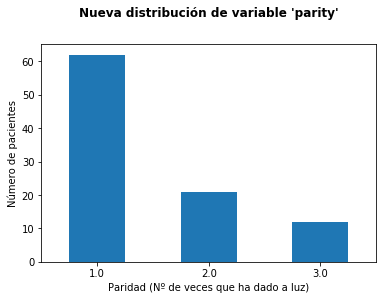

In [1558]:
frecuencias = test["parity"].value_counts()
fig, ax = plt.subplots()
frecuencias.plot(kind='bar')
plt.title("Nueva distribución de variable 'parity'",fontweight = "bold" , fontsize = 12, y=1.1)
plt.xlabel("Paridad (Nº de veces que ha dado a luz)" )
plt.ylabel("Número de pacientes")
ax.tick_params( labelrotation=0)

Estudiemos ahora <code>notch</code>

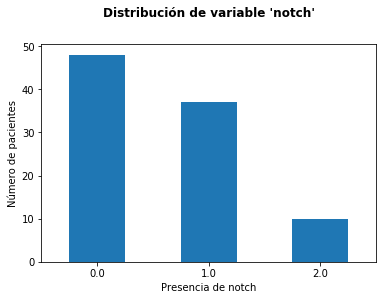

In [1559]:
frecuencias = data["notch"].value_counts()
fig, ax = plt.subplots()
frecuencias.plot(kind='bar')
plt.title("Distribución de variable 'notch'",fontweight = "bold" , fontsize = 12, y=1.1)
plt.xlabel("Presencia de notch" )
plt.ylabel("Número de pacientes")
ax.tick_params( labelrotation=0)

Igual que en el caso anterior, nos encontramos con una clase bastante minoritaria respecto al resto. Esta variable representa si una embarazada tiene una escotadura protodiastólica (notch) en una arteria uterina (1) o  en ambas arterias (2), o no presenta ninguna (0). Como podemos ver, en muy pocos casos se posee un notch en ambas arterias.

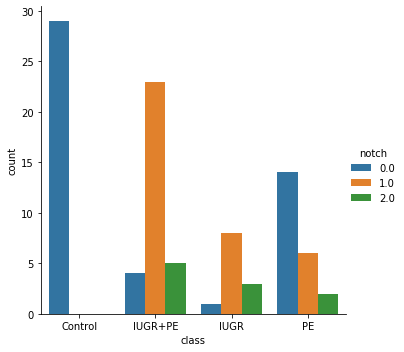

In [1560]:
sns.catplot(x="class", hue="notch", kind="count",  data=data)


In [1561]:
cat_binaria=["parity", "bilateralNotch"]

## División de dataset

Sacamos clase:

In [1562]:
X = data.drop('class', axis=1)
y = data['class']

Dividimos el dataset en train/test:

In [1563]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=8)

In [1564]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count          76
unique          4
top       IUGR+PE
freq           27
Name: class, dtype: object


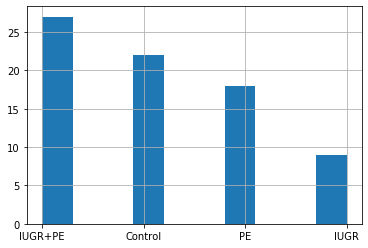

In [1565]:
y_train.hist()

In [1566]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count          19
unique          4
top       Control
freq            7
Name: class, dtype: object


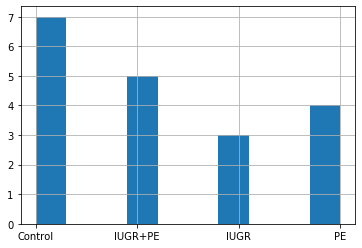

In [1567]:
y_test.hist()

In [1568]:
y_train.value_counts()/len(y_train)

IUGR+PE    0.355263
Control    0.289474
PE         0.236842
IUGR       0.118421
Name: class, dtype: float64

In [1569]:
y_test.value_counts()/len(y_test)

Control    0.368421
IUGR+PE    0.263158
PE         0.210526
IUGR       0.157895
Name: class, dtype: float64

In [1570]:
X_test.notch.value_counts()

0.0    10
1.0     5
2.0     4
Name: notch, dtype: int64

In [1571]:
print(X_train.parity.value_counts())
print(X_test.parity.value_counts())

1.0    53
2.0    14
3.0     7
5.0     1
6.0     1
Name: parity, dtype: int64
1.0    9
2.0    7
3.0    2
4.0    1
Name: parity, dtype: int64


In [1572]:
X_train.notch.value_counts()

0.0    38
1.0    32
2.0     6
Name: notch, dtype: int64

Así tenemos distribuciones similares tanto en train como en test, para evitar que nos de una sensación errónea de la ejecución del modelo frente al validarlo con el conjunto de test.

---

# Preprocesamiento (Feature engineering)  

En las siguientes celdas vamos:
* Imputación de valores ausentes.
* blablabla

Antes de comenzar, cargamos todas las librerías necesarias para ejecutar las celdas del apartado de preprocesamiento

In [1573]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from collections import Counter

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from feature_engine.transformation import LogTransformer
from feature_engine.imputation import MeanMedianImputer
from feature_engine.selection import DropFeatures
from sklearn.preprocessing import Binarizer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

from sklearn import preprocessing

set_config(display='diagram')

random.seed(8)
np.random.seed(8)


## Selección de atributos

En el análisis exploratorio, hemos podido comprobar que existen atributos altamente correlados. Vamos a eliminar esos atributos del conjunto de train.

In [1574]:
cor_matrix = X_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

In [1575]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.89)]
print(to_drop)

['BMI', 'L-PI', 'meanRI', 'meanPI', 'meanPSV']


In [1576]:
p0=('drop_features', DropFeatures(features_to_drop=["BMI",'meanRI','meanPI','meanPSV']))

## Valores ausentes

In [1577]:
X_train.isnull().sum()

age          0
weight       1
height       1
BMI          3
R-RI         0
R-PI         0
R-PSV        0
L-RI         0
L-PI         0
L-PSV        0
meanRI       0
meanPI       0
meanPSV      2
notch        0
parity       0
S-Flt1       0
S-PLGF       0
ratio_F_P    0
dtype: int64

En total, tenemos 2 valores ausentes: uno en <code>weight</code> y otro en <code>height</code> (los valores ausentes en <code>BMI</code> y <code>meanPSV</code> no los vamos a tratar porque estos atributos no los vamos a tener en cuenta para el entrenamiento del modelo).

In [1578]:
nulos = X_train[X_train.isnull().any(1)]
print('Tenemos {} filas con valores nulos'.format(nulos.shape[0]))
nulos

Tenemos 5 filas con valores nulos


,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,notch,parity,S-Flt1,S-PLGF,ratio_F_P
59,43.0,66.0,1.52,NaN,0.63,0.60,67.4,0.59,0.67,62.9,0.610,0.635,65.15,0.0,1.0,27390.0,153.60,178.320312
97,26.0,74.0,1.65,27.180900,0.69,0.62,54.9,0.73,0.71,60.5,0.710,0.665,NaN,2.0,1.0,12154.0,15.84,767.297980
96,30.0,53.0,1.57,21.501886,0.49,0.52,60.4,0.51,0.56,58.1,0.500,0.540,NaN,0.0,1.0,10535.0,34.97,301.258221
60,36.0,52.0,1.64,NaN,0.67,0.81,57.9,0.69,0.89,61.4,0.680,0.850,59.65,1.0,1.0,29805.0,79.73,373.824157
63,26.0,NaN,NaN,NaN,0.84,2.02,68.8,0.83,2.28,59.4,0.835,2.150,64.10,1.0,1.0,10015.0,42.64,234.873358


En la fila **61** faltan ambos valores. Para las columnas weight y height. Vamos a sustituir ambos valores ausentes por el valor medio de la columna. 

In [1579]:
p1=('impute_nan_values', MeanMedianImputer(
        imputation_method='mean', variables=['weight', 'height']))

## Transformación logarítmica  

Vamos a aplicar una transformación logarítmica a los atributos del conjunto de train que no tienen una distribución normal.

In [1580]:
skewed_data

array(['R-RI', 'R-PI', 'R-PSV', 'L-RI', 'L-PI', 'L-PSV', 'meanRI',
       'meanPI', 'S-Flt1', 'S-PLGF', 'ratio_F_P'], dtype=object)

De esta lista debemos tomar sólo las columnas presentes en el conjunto de train.

In [1581]:
sk =['R-RI', 'R-PI', 'R-PSV', 'L-RI', 'L-PI', 'L-PSV', 'S-Flt1', 'S-PLGF', 'ratio_F_P']
p2= ('log_transf',  LogTransformer(variables=sk))

## Escalado de variables numéricas  

La estrategia elegida para llevar a cabo el escalado ha sido la normalización min-max. Esto consiste en que a cada valor le resta el valor mínimo y lo divide por la diferencia entre el máximo y el mínimo (produce valores entre 0 y 1)

In [1582]:
from sklearn.preprocessing import StandardScaler

In [1583]:
num_vars=['age', 'weight','height','R-RI','R-PI','R-PSV','L-RI','L-PI','L-PSV', 
          'S-Flt1', 'S-PLGF','ratio_F_P']
p3=('normalization', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars))

## Codificación de variables categóricas  

En este apartado vamos a binarizar las variables <code>parity</code> y <code>bilateralNotch</code> como vimos  en el apartado de análisis exploratorio.

In [1584]:
from sklearn.preprocessing import OneHotEncoder

https://feature-engine.readthedocs.io/en/latest/outliers/Winsorizer.html -> probar

In [1585]:
X_train['parity'] = np.where(X_train['parity']>3.0, 3.0, X_train['parity'])
X_train['parity'].unique()

D:\Archivos_de_programa_1T\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([1.0, 3.0, 2.0], dtype=object)

In [1586]:
from feature_engine.encoding import OneHotEncoder


In [1587]:
p4= ('one_hot_encoding_parity_notch',OneHotEncoder(variables=['notch']))
p5= ('one_hot_encoding_parity_parity',OneHotEncoder(variables=['parity']))

## Pipeline final  

Finalmente, vamos a aplicar todas estas transformaciones en el conjunto de train

In [1588]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 59 to 69
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        76 non-null     float64
 1   weight     75 non-null     float64
 2   height     75 non-null     float64
 3   BMI        73 non-null     float64
 4   R-RI       76 non-null     float64
 5   R-PI       76 non-null     float64
 6   R-PSV      76 non-null     float64
 7   L-RI       76 non-null     float64
 8   L-PI       76 non-null     float64
 9   L-PSV      76 non-null     float64
 10  meanRI     76 non-null     float64
 11  meanPI     76 non-null     float64
 12  meanPSV    74 non-null     float64
 13  notch      76 non-null     object 
 14  parity     76 non-null     object 
 15  S-Flt1     76 non-null     float64
 16  S-PLGF     76 non-null     float64
 17  ratio_F_P  76 non-null     float64
dtypes: float64(16), object(2)
memory usage: 11.3+ KB


In [1589]:
prec_pipe=Pipeline([p0,p1,p2,p3, p4,p5])
prec_pipe

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['BMI', 'meanRI', 'meanPI',
                                                'meanPSV'])),
                ('impute_nan_values',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['weight', 'height'])),
                ('log_transf',
                 LogTransformer(variables=['R-RI', 'R-PI', 'R-PSV', 'L-RI',
                                           'L-PI', 'L-PSV', 'S-Flt1', 'S-PLGF',
                                           'ratio_F_P'])),
                ('normalization',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['age', 'weight', 'height',
                                                      'R-RI', 'R-PI', 'R-PSV',
                                                      'L-RI', 'L-PI', 'L-PSV',
                                                      'S-Flt1', 'S-PLGF',
                                                      'ratio_F_P'])),
                ('one_hot_encoding_parity_notch',
                 OneHotEncoder(variables=['notch'])),
                ('one_hot_encoding_parity_parity',
                 OneHotEncoder(variables=['parity']))])

In [1590]:
X_train['notch'].isnull().sum()

0

In [1591]:
X_train_prec=prec_pipe.fit_transform(X_train)

In [1592]:
X_train_prec.head(10)

,age,weight,height,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,S-Flt1,S-PLGF,ratio_F_P,notch_0.0,notch_1.0,notch_2.0,parity_1.0,parity_3.0,parity_2.0
59,2.255062,-0.161080,-2.317489,0.023143,-1.020398,1.019268,-0.499070,-0.996980,0.326403,1.157708,0.172504,0.436888,1,0,0,1,0,0
35,0.843659,-0.689212,-1.805776,0.688062,0.487213,3.526655,1.036215,1.034865,4.067687,-0.062667,0.049716,-0.060650,0,1,0,1,0,0
40,0.238771,-0.689212,0.752786,0.562685,1.142014,-0.812464,0.820523,0.946845,-0.065036,0.746317,-0.437984,0.625723,0,1,0,0,1,0
16,-1.172632,-0.227097,0.752786,0.367836,-0.496479,-0.951447,0.361972,-0.445493,-0.134626,-0.793046,1.378411,-1.236930,1,0,0,1,0,0
19,-0.769374,-0.755229,0.752786,-0.589770,-0.820227,-0.374170,-0.499070,-0.962645,0.590356,-1.515424,0.509032,-1.032282,1,0,0,1,0,0
51,0.037142,-0.557179,-0.952922,-1.495455,-1.091599,-2.281909,-1.749586,-1.584366,-1.552757,1.180952,-0.494031,0.865434,1,0,0,1,0,0
34,-0.366116,-0.821245,0.752786,1.101332,1.679527,-0.624586,0.893365,1.549136,-1.296209,1.150110,-0.127526,0.621289,0,1,0,1,0,0
30,0.238771,-0.227097,0.411644,1.101332,1.679527,0.294141,1.243766,1.758465,0.225686,0.660022,-1.668165,1.355848,0,1,0,0,0,1
31,-1.172632,-0.689212,0.752786,-2.027045,-1.241677,0.294141,0.200212,0.592080,1.876791,1.741849,-0.257683,0.981386,0,0,1,1,0,0
45,-0.567745,-0.029047,-0.952922,1.044560,0.945590,-0.194593,0.893365,1.077652,0.242539,0.063140,-1.197771,0.780161,0,1,0,1,0,0


## Codificación de la clase

In [1593]:
def class_encode(data):
    aux=pd.DataFrame(data)
    aux['PE'] = aux['class'].apply(lambda x: 1 if (x =="PE" or x=="IUGR+PE") else 0)
    aux['IUGR'] = aux['class'].apply(lambda x: 1 if (x =="IUGR" or x=="IUGR+PE") else 0)
    aux = aux.drop('class', axis=1)
    return aux

def class_decode(pred):
    real=[]
    for i in pred:
        if(np.array_equal(i,np.array([0,0]))):
            real.append("Control")    
        elif(np.array_equal(i,np.array([1,0]))):   
            real.append("PE")   
        elif(np.array_equal(i,np.array([0,1]))):
            real.append("IUGR")
        elif(np.array_equal(i,np.array([1,1]))):
            real.append("IUGR+PE")
    return real

In [1594]:
y_train_enc= class_encode(y_train)
y_train_enc.head()

,PE,IUGR
59,1,1
35,1,1
40,1,1
16,0,0
19,0,0


----

# Modelo predictivo (Clasificación)

In [1]:
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import hamming_loss
from skmultilearn.problem_transform import LabelPowerset
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier



from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from collections import Counter

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from feature_engine.transformation import LogTransformer
from feature_engine.imputation import MeanMedianImputer
from feature_engine.selection import DropFeatures
from sklearn.preprocessing import Binarizer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
set_config(display='diagram')

random.seed(10)
np.random.seed(10)

## 1. Entrenamiento del modelo

Contamos con un dataset con pocas instancias, por lo que vamos a optar por utilizar todo el dataset para hacer la evaluación del modelo, es decir, vamos a utilizar la técnica de *cross validation* --> **CAMBIARRRRR**

Métricas que vamos a utilizar **EXPLICAR MEJOR**:
* **Matriz de confusión**: La matriz de confusión muestra el número de veces que se han producido los distintos tipos de aciertos y fallos. Tenemos TP, TN, FP y FN.
* **Precision**: Es el número de elementos identificados correctamente como positivo de un total de elementos identificados como positivos (TP/(TP+FP)) 
* **Recall** (cobertura): (TP/(TP+FN))
* **F1-score**: media armónica de precisión y cobertura

In [1630]:
RESULTADOS= pd.DataFrame(columns=['Parametros','modelo','Roc_auc'])

In [1600]:
train_data=[X_train_prec, y_train_enc]

In [1627]:
def evalua_modelos(parametros,clasificador, nombre_modelo, train_data,  res_df):
    grid= GridSearchCV(clasificador, parametros, scoring= "roc_auc", return_train_score=True)
    grid.fit(train_data[0], train_data[1])
    res_df.loc[nombre_modelo]= (grid.best_params_,grid.best_estimator_,grid.best_score_)
    

### ALGORITMOS QUE SOPORTAN CLASIFICACIÓN MULTILABEL

* Decision Tree Classifier
* Extra Tree Classifier
* Kneighbors Classifier
* Random Forest Classifier

#### DecisionTreeClassifier

In [1631]:
parametros= {"criterion":["gini", 'entropy'],"splitter":['best', 'random'],"random_state":[10]}

In [1632]:
parametros= {"criterion":["gini", 'entropy'],"splitter":['best', 'random'],"random_state":[10]}
grid = evalua_modelos(parametros,DecisionTreeClassifier(),"DecisionTreeClassifier", train_data, RESULTADOS)
RESULTADOS

,Parametros,modelo,Roc_auc
DecisionTreeClassifier,"{'criterion': 'entropy', 'random_state': 10, '...","DecisionTreeClassifier(criterion='entropy', ra...",0.750476


In [1633]:
parametros= {"random_state":[10]}
grid = evalua_modelos(parametros,DecisionTreeClassifier(),"DecisionTreeClassifier_sin_ajustar", train_data, RESULTADOS)
RESULTADOS

,Parametros,modelo,Roc_auc
DecisionTreeClassifier,"{'criterion': 'entropy', 'random_state': 10, '...","DecisionTreeClassifier(criterion='entropy', ra...",0.750476
DecisionTreeClassifier_sin_ajustar,{'random_state': 10},DecisionTreeClassifier(random_state=10),0.728690


#### Extra trees


In [1636]:
parametros= {"criterion":['gini', 'entropy'], "n_estimators":[100,200,300], "random_state":[10]}

evalua_modelos(parametros,ExtraTreesClassifier(),"ExtraTreesClassifier", train_data, RESULTADOS)
RESULTADOS

,Parametros,modelo,Roc_auc
DecisionTreeClassifier,"{'criterion': 'entropy', 'random_state': 10, '...","DecisionTreeClassifier(criterion='entropy', ra...",0.750476
DecisionTreeClassifier_sin_ajustar,{'random_state': 10},DecisionTreeClassifier(random_state=10),0.728690
ExtraTreesClassifier,"{'criterion': 'entropy', 'n_estimators': 100, ...","(ExtraTreeClassifier(criterion='entropy', rand...",0.825302


In [1637]:
parametros= { "random_state":[10]}

evalua_modelos(parametros,ExtraTreesClassifier(),"ExtraTreesClassifier_Sin_ajustar", train_data, RESULTADOS)
RESULTADOS

,Parametros,modelo,Roc_auc
DecisionTreeClassifier,"{'criterion': 'entropy', 'random_state': 10, '...","DecisionTreeClassifier(criterion='entropy', ra...",0.750476
DecisionTreeClassifier_sin_ajustar,{'random_state': 10},DecisionTreeClassifier(random_state=10),0.728690
ExtraTreesClassifier,"{'criterion': 'entropy', 'n_estimators': 100, ...","(ExtraTreeClassifier(criterion='entropy', rand...",0.825302
ExtraTreesClassifier_Sin_ajustar,{'random_state': 10},"(ExtraTreeClassifier(random_state=1165313289),...",0.811677


#### KNeighbotsClassifier

In [1638]:
parametros= {"n_neighbors":[1,2,3,4,5,6,7,8,9,10], "weights":['uniform', 'distance'], 
"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'] }
grid =evalua_modelos(parametros,KNeighborsClassifier(),"KNeighborsClassifier", train_data, RESULTADOS)
RESULTADOS

,Parametros,modelo,Roc_auc
DecisionTreeClassifier,"{'criterion': 'entropy', 'random_state': 10, '...","DecisionTreeClassifier(criterion='entropy', ra...",0.750476
DecisionTreeClassifier_sin_ajustar,{'random_state': 10},DecisionTreeClassifier(random_state=10),0.728690
ExtraTreesClassifier,"{'criterion': 'entropy', 'n_estimators': 100, ...","(ExtraTreeClassifier(criterion='entropy', rand...",0.825302
ExtraTreesClassifier_Sin_ajustar,{'random_state': 10},"(ExtraTreeClassifier(random_state=1165313289),...",0.811677
KNeighborsClassifier,"{'algorithm': 'auto', 'n_neighbors': 7, 'weigh...","KNeighborsClassifier(n_neighbors=7, weights='d...",0.794977


In [1640]:
parametros={}
grid =evalua_modelos(parametros,KNeighborsClassifier(),"KNeighborsClassifier_sin_ajustar", train_data, RESULTADOS)
RESULTADOS

,Parametros,modelo,Roc_auc
DecisionTreeClassifier,"{'criterion': 'entropy', 'random_state': 10, '...","DecisionTreeClassifier(criterion='entropy', ra...",0.750476
DecisionTreeClassifier_sin_ajustar,{'random_state': 10},DecisionTreeClassifier(random_state=10),0.728690
ExtraTreesClassifier,"{'criterion': 'entropy', 'n_estimators': 100, ...","(ExtraTreeClassifier(criterion='entropy', rand...",0.825302
ExtraTreesClassifier_Sin_ajustar,{'random_state': 10},"(ExtraTreeClassifier(random_state=1165313289),...",0.811677
KNeighborsClassifier,"{'algorithm': 'auto', 'n_neighbors': 7, 'weigh...","KNeighborsClassifier(n_neighbors=7, weights='d...",0.794977
KNeighborsClassifier_sin_ajustar,{},KNeighborsClassifier(),0.786009


#### RandomForestClassifier

In [1641]:
parametros= {"criterion":["gini", 'entropy'], "max_features":['auto', 'sqrt', 'log2'], "random_state":[10] }

evalua_modelos(parametros,RandomForestClassifier(),"RandomForestClassifier", train_data, RESULTADOS)
RESULTADOS

,Parametros,modelo,Roc_auc
DecisionTreeClassifier,"{'criterion': 'entropy', 'random_state': 10, '...","DecisionTreeClassifier(criterion='entropy', ra...",0.750476
DecisionTreeClassifier_sin_ajustar,{'random_state': 10},DecisionTreeClassifier(random_state=10),0.728690
ExtraTreesClassifier,"{'criterion': 'entropy', 'n_estimators': 100, ...","(ExtraTreeClassifier(criterion='entropy', rand...",0.825302
ExtraTreesClassifier_Sin_ajustar,{'random_state': 10},"(ExtraTreeClassifier(random_state=1165313289),...",0.811677
KNeighborsClassifier,"{'algorithm': 'auto', 'n_neighbors': 7, 'weigh...","KNeighborsClassifier(n_neighbors=7, weights='d...",0.794977
KNeighborsClassifier_sin_ajustar,{},KNeighborsClassifier(),0.786009
RandomForestClassifier,"{'criterion': 'entropy', 'max_features': 'auto...","(DecisionTreeClassifier(criterion='entropy', m...",0.833569


In [1642]:
parametros= { "random_state":[10] }

evalua_modelos(parametros,RandomForestClassifier(),"RandomForestClassifier_Sin_ajustar", train_data, RESULTADOS)
RESULTADOS

,Parametros,modelo,Roc_auc
DecisionTreeClassifier,"{'criterion': 'entropy', 'random_state': 10, '...","DecisionTreeClassifier(criterion='entropy', ra...",0.750476
DecisionTreeClassifier_sin_ajustar,{'random_state': 10},DecisionTreeClassifier(random_state=10),0.728690
ExtraTreesClassifier,"{'criterion': 'entropy', 'n_estimators': 100, ...","(ExtraTreeClassifier(criterion='entropy', rand...",0.825302
ExtraTreesClassifier_Sin_ajustar,{'random_state': 10},"(ExtraTreeClassifier(random_state=1165313289),...",0.811677
KNeighborsClassifier,"{'algorithm': 'auto', 'n_neighbors': 7, 'weigh...","KNeighborsClassifier(n_neighbors=7, weights='d...",0.794977
KNeighborsClassifier_sin_ajustar,{},KNeighborsClassifier(),0.786009
RandomForestClassifier,"{'criterion': 'entropy', 'max_features': 'auto...","(DecisionTreeClassifier(criterion='entropy', m...",0.833569
RandomForestClassifier_Sin_ajustar,{'random_state': 10},"(DecisionTreeClassifier(max_features='auto', r...",0.808469


### Binary Relevance

In [1663]:
BR_GNB = BinaryRelevance(GaussianNB())
BR_GNB.fit(X_train_prec, y_train_enc)

BR_RF = BinaryRelevance(RandomForestClassifier(random_state=8))
BR_RF.fit(X_train_prec, y_train_enc)

BR_SVC = BinaryRelevance(SVC(random_state=8))
BR_SVC.fit(X_train_prec, y_train_enc)


BR_KN = BinaryRelevance(KNeighborsClassifier())
BR_KN.fit(X_train_prec, y_train_enc)

BR_DT = BinaryRelevance(DecisionTreeClassifier(random_state=8))
BR_DT.fit(X_train_prec, y_train_enc)

BR=[BR_GNB, BR_RF, BR_SVC,BR_LR, BR_KN, BR_DT]
BR_label=["BR_GaussianNB", "BR_RandomForest", "BR_SVC",  "BR_KNeighborsClassifier", "BR_DecisionTreeClassifier"]

#### Label Powerset

In [1666]:
LP_RF = LabelPowerset(RandomForestClassifier(random_state=8))
LP_RF.fit(X_train_prec, y_train_enc)

LP_SVC = LabelPowerset(SVC(random_state=8))
LP_SVC.fit(X_train_prec, y_train_enc)

LP_KN = LabelPowerset(KNeighborsClassifier())
LP_KN.fit(X_train_prec, y_train_enc)

LP_DT = LabelPowerset(DecisionTreeClassifier(random_state=8))
LP_DT.fit(X_train_prec, y_train_enc)

LP=[LP_RF,LP_SVC,LP_KN,LP_DT]
LP_label=[ "LP_RandomForest", "LP_SVC", "LP_KNeighborsClassifier", "LP_DecisionTreeClassifier"]

### Evaluación modelos

In [ ]:
evaluacion =pd.DataFrame(columns=['Accuracy', 'Precision' ,"Recall","F1", "roc auc scores", "Hamming Loss"])

In [1852]:
def test_modelo(clasificador, nombre_clasificador, train_data, X_test, y_test, eval_pd):
    clasificador.fit(train_data[0], train_data[1])
    y_pred =clasificador.predict(X_test)
    
    accuracy=metrics.accuracy_score(y_test,y_pred)
    f1= metrics.f1_score(y_test,y_pred, average="macro")
    precisicion= metrics.precision_score(y_test,y_pred,  average="macro")
    recall= metrics.recall_score(y_test,y_pred,  average="macro")
    auc=metrics.roc_auc_score(y_test,np.array(y_pred))
    hl=hamming_loss(y_test,y_pred)
    res= (accuracy,precisicion,recall,f1, auc, hl)
    #a=metrics.classification_report(y_test, y_pred)
    #print(a)
    c_matrix = multilabel_confusion_matrix(np.array(y_test),y_pred,  labels=[0,1])
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
    axes = axes.flat
    label=["PE", "IUGR"]
    for i, matrix in enumerate(c_matrix):
        
        graph= sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        bottom, top = graph.get_ylim()
        
        axes[i].set_title("Etiqueta:"+label[i],fontsize = 13)
        axes[i].tick_params(labelsize = 12)
        axes[i].set_xlabel("")
        axes[i].set_ylim(bottom + 0.5, top - 0.5)
        
    fig.tight_layout()
    plt.subplots_adjust(top = 0.9)
    fig.suptitle('Matriz de confusión para modelo '+nombre_clasificador, fontsize = 15, fontweight = "bold", y=1.1);
    
    eval_pd.loc[nombre_clasificador]=res

    graf_roc_curve(np.array(y_test),y_pred)
    

In [1851]:
def test_modelo2(clasificador, nombre_clasificador, train_data, X_test, y_test, eval_pd):
    clasificador.fit(train_data[0], train_data[1])
    y_pred =clasificador.predict(X_test)
    
    accuracy=metrics.accuracy_score(y_test,y_pred)
    f1= metrics.f1_score(y_test,y_pred, average="macro")
    precisicion= metrics.precision_score(y_test,y_pred,  average="macro")
    recall= metrics.recall_score(y_test,y_pred,  average="macro")
    auc=metrics.roc_auc_score(y_test,y_pred.toarray())
    hl=hamming_loss(y_test,y_pred)
    res= (accuracy,precisicion,recall,f1, auc, hl)
    #a=metrics.classification_report(y_test, y_pred)
    #print(a)
    c_matrix = multilabel_confusion_matrix(np.array(y_test),y_pred,  labels=[0,1])
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
    axes = axes.flat
    label=["PE", "IUGR"]
    for i, matrix in enumerate(c_matrix):
        
        graph= sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        bottom, top = graph.get_ylim()
        
        axes[i].set_title("Etiqueta:"+label[i],fontsize = 13)
        axes[i].tick_params(labelsize = 12)
        axes[i].set_xlabel("")
        axes[i].set_ylim(bottom + 0.5, top - 0.5)
        
    fig.tight_layout()
    plt.subplots_adjust(top = 0.9)
    fig.suptitle('Matriz de confusión para modelo '+nombre_clasificador, fontsize = 15, fontweight = "bold", y=1.1);
    
    eval_pd.loc[nombre_clasificador]=res

    graf_roc_curve(np.array(y_test),y_pred.toarray())

In [1829]:
def graf_roc_curve(y_test, y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(2):
        mean_tpr = mean_tpr+ np.interp(all_fpr, fpr[i], tpr[i])
    
    # Finally average it and compute AUC
    mean_tpr /= n_classes
    

    
    # Plot all ROC curves
    plt.figure(figsize=(8,6))

    
    
    colors = [ "darkorange", "cornflowerblue"]
    label=["PE", "IUGR"]
    for i in range(2):
        plt.plot(
            fpr[i],
            tpr[i],
            color=colors[i],
            lw=lw,
            label="Curva ROC de la etiqueta {0} (area = {1:0.2f})".format(label[i], roc_auc[i]),
        )
    
    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Tasa de Falsos Positivos (FPR)")
    plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
    plt.title("Curva ROC")
    plt.legend(loc="lower right")
    plt.show()    
    

In [1830]:
X_test_prec =X_test.copy()
X_test_prec['parity'] = np.where(X_test['parity']>3.0, 3.0, X_test['parity'])
y_test_enc= class_encode(pd.DataFrame(y_test))
X_test_prec= prec_pipe.fit_transform(X_test_prec)

### Modelo baseline

In [1831]:
from sklearn.metrics import RocCurveDisplay

In [1832]:
clf_dummy = DummyClassifier(strategy= "most_frequent", random_state=8) 

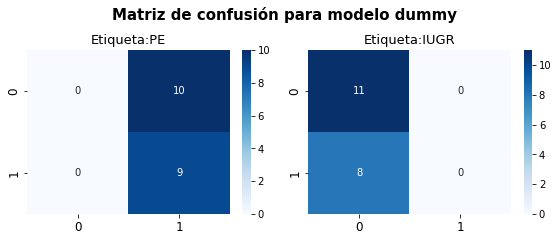

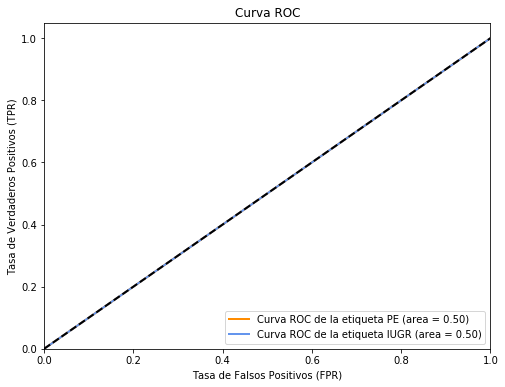

In [1853]:
test_modelo(clf_dummy, "dummy", [X_train_prec, y_train_enc], X_test_prec, y_test_enc,evaluacion)

### Evaluación modelos adaptados

In [1869]:
RESULTADOS.drop("BR_GaussianNB", axis=0, inplace=True)

In [1870]:
RESULTADOS.shape

(8, 3)

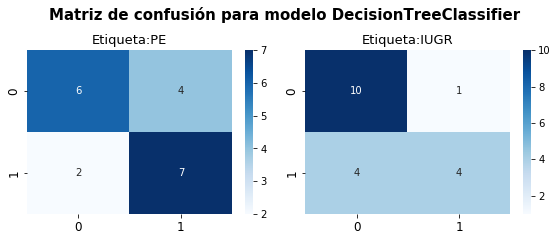

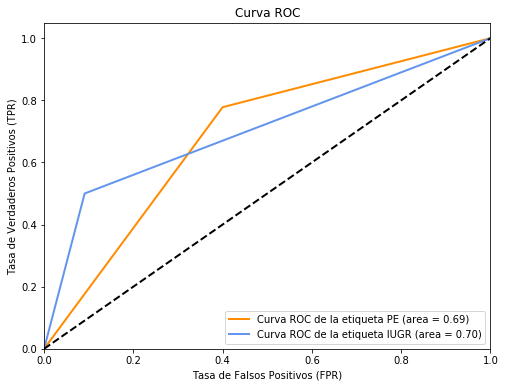

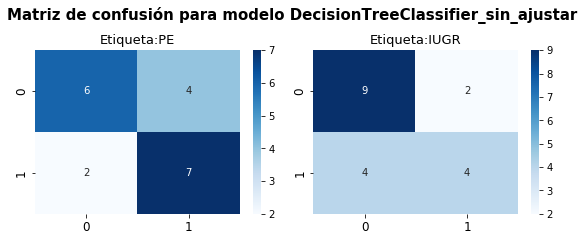

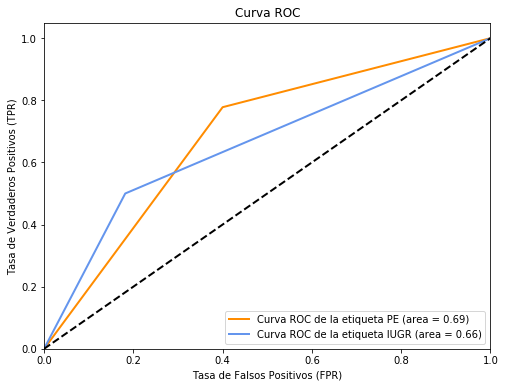

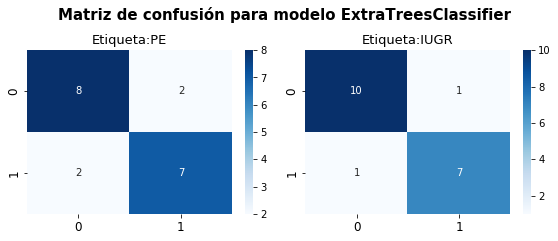

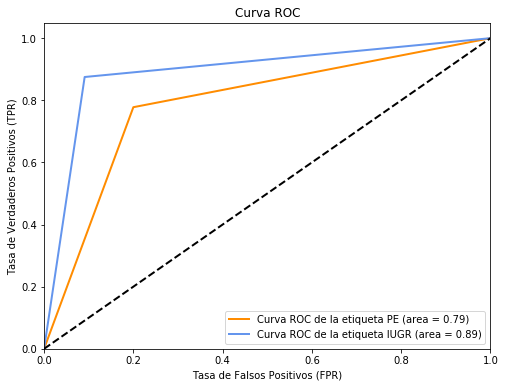

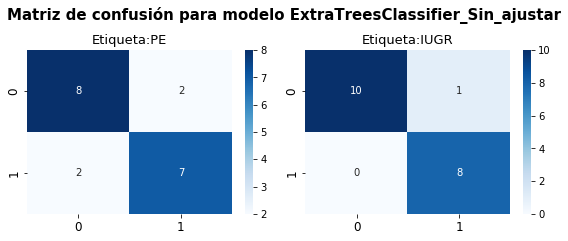

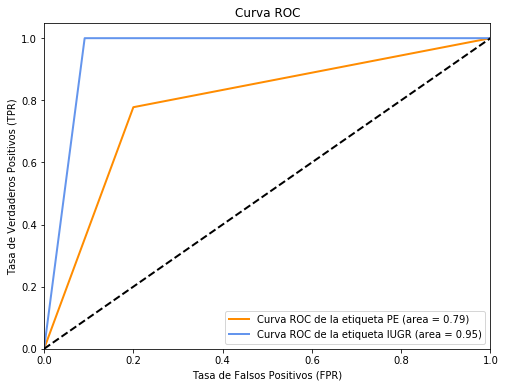

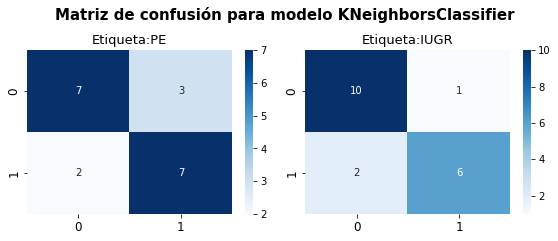

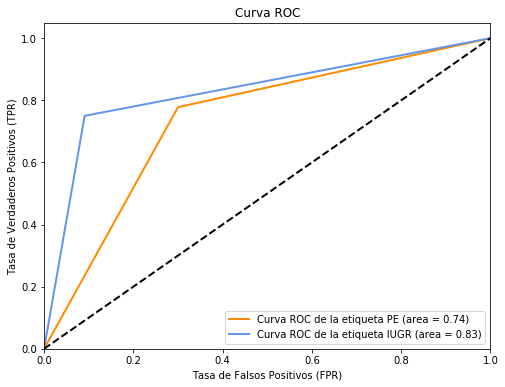

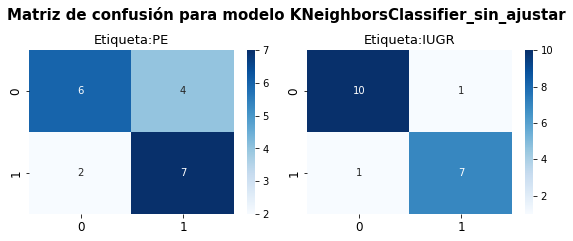

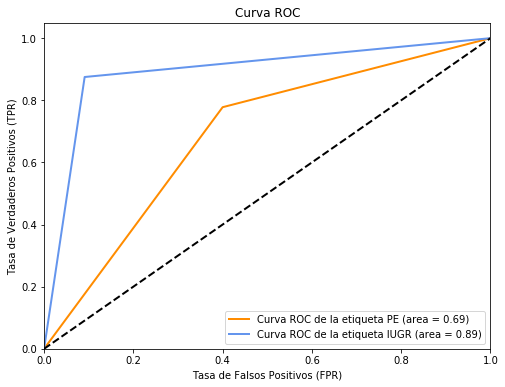

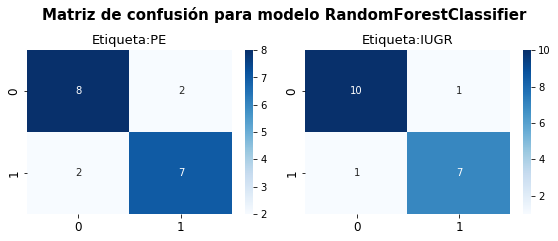

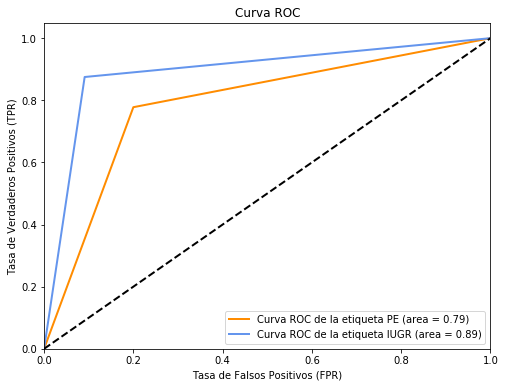

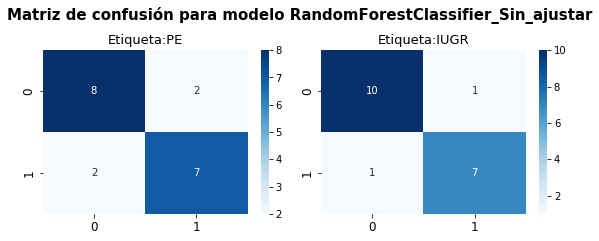

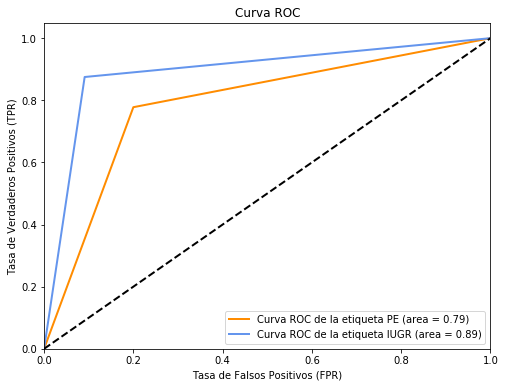

In [1871]:
for i in range(8):
    modelo=RESULTADOS.iloc[i]['modelo']
    test_modelo(modelo, RESULTADOS.index[i],train_data, X_test_prec, y_test_enc, evaluacion)

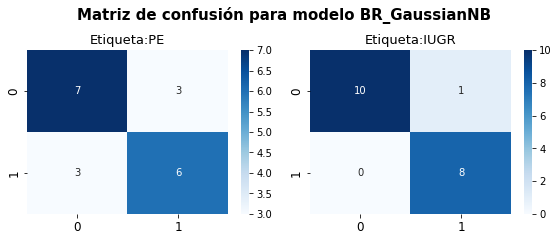

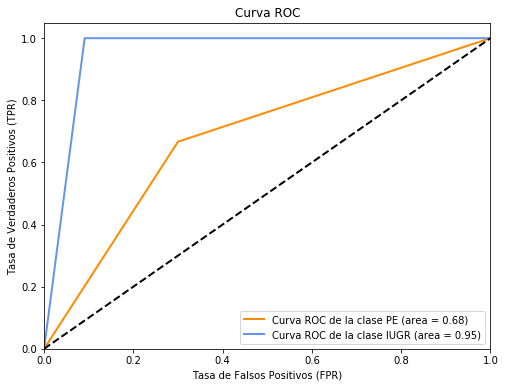

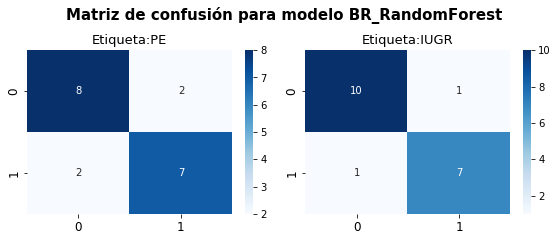

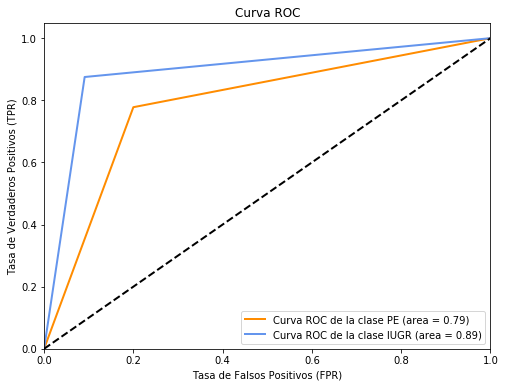

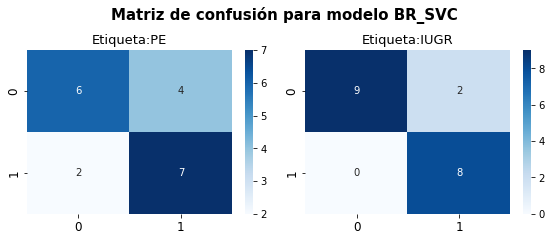

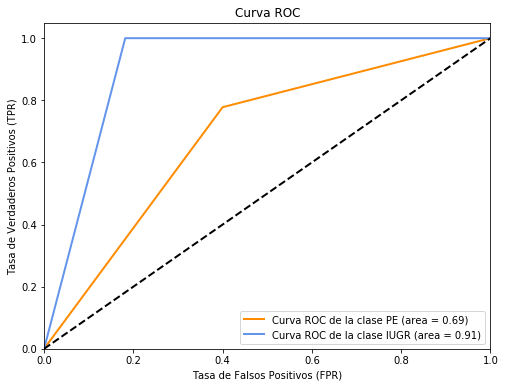

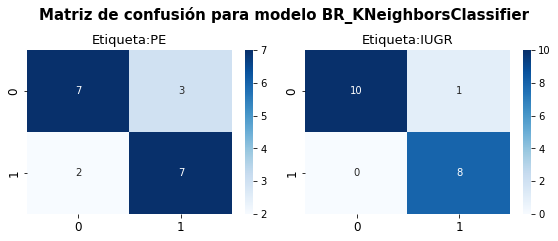

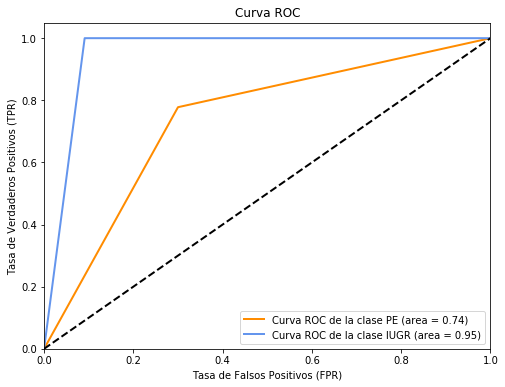

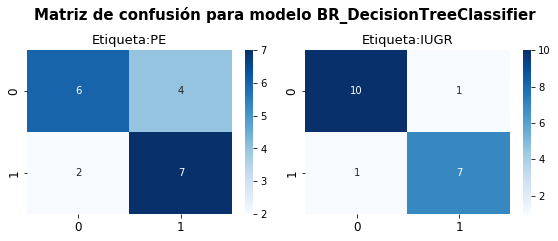

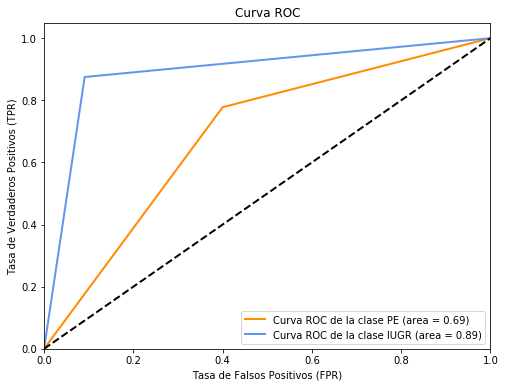

In [1825]:
for i in range(5):
    modelo=BR[i]
    test_modelo2(modelo, BR_label[i],train_data, X_test_prec, y_test_enc, evaluacion)
    

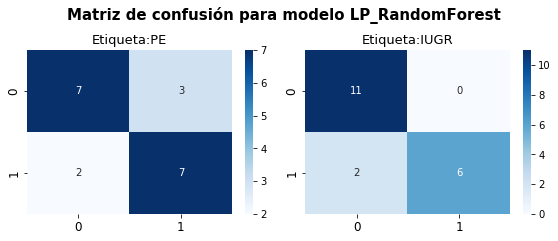

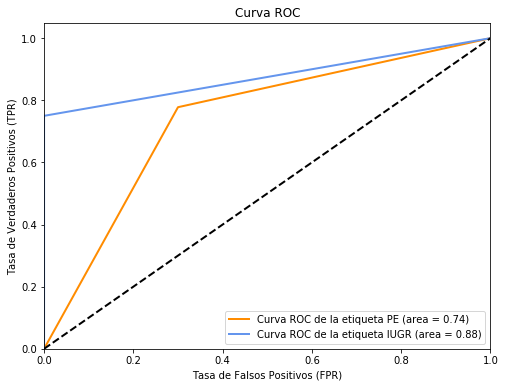

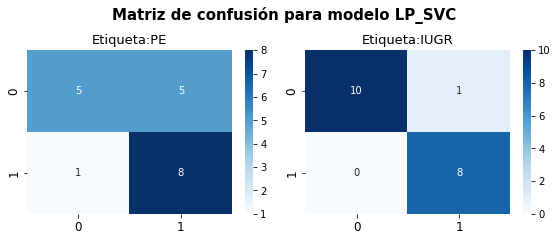

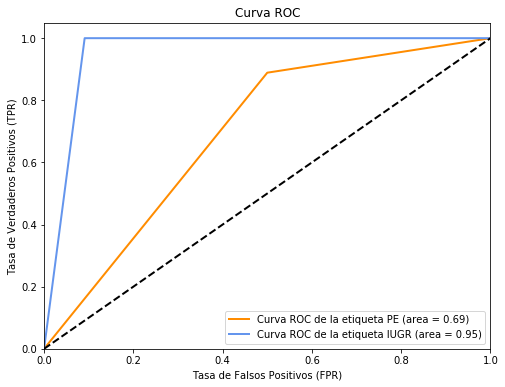

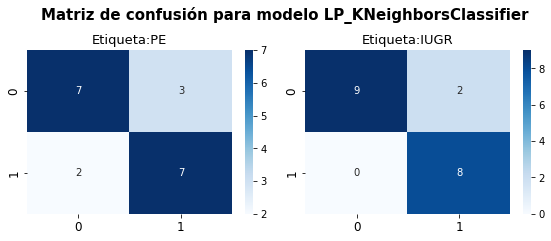

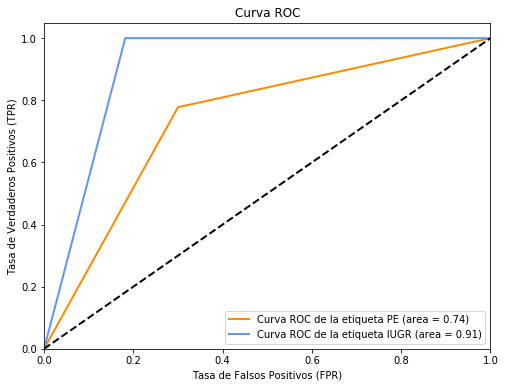

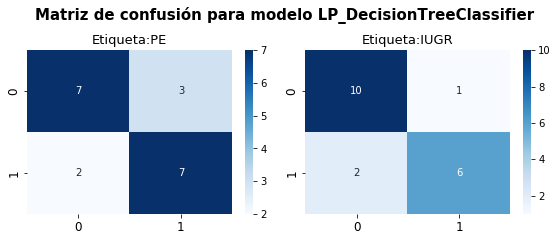

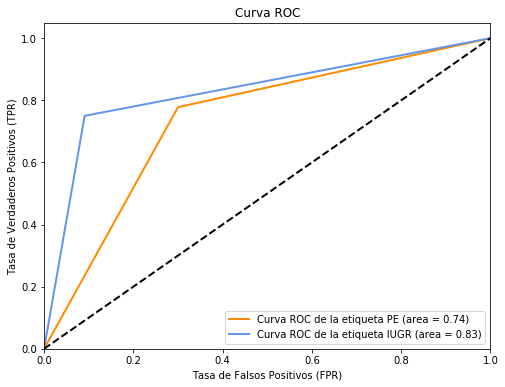

In [1875]:
for i in range(4):
    modelo=LP[i]
    test_modelo2(modelo, LP_label[i],train_data, X_test_prec, y_test_enc, evaluacion)

In [1876]:
evaluacion.sort_values(["roc auc scores"], ascending=False)

,Accuracy,Precision,Recall,F1,roc auc scores,Hamming Loss
ExtraTreesClassifier_Sin_ajustar,0.789474,0.833333,0.888889,0.859477,0.871717,0.131579
BR_KNeighborsClassifier,0.736842,0.794444,0.888889,0.839009,0.846717,0.157895
LP_GaussianNB,0.684211,0.819444,0.833333,0.823529,0.843939,0.157895
RandomForestClassifier_Sin_ajustar,0.736842,0.826389,0.826389,0.826389,0.840467,0.157895
ExtraTreesClassifier,0.736842,0.826389,0.826389,0.826389,0.840467,0.157895
RandomForestClassifier,0.736842,0.826389,0.826389,0.826389,0.840467,0.157895
BR_RandomForest,0.736842,0.826389,0.826389,0.826389,0.840467,0.157895
LP_SVC,0.631579,0.752137,0.944444,0.834225,0.824495,0.184211
LP_KNeighborsClassifier,0.684211,0.750000,0.888889,0.812865,0.823990,0.184211
BR_GaussianNB,0.631579,0.777778,0.833333,0.803922,0.818939,0.184211


In [1902]:
X_=X.copy()
X_['parity'] = np.where(X_['parity']>3.0, 3.0, X_['parity'])
X_prec= prec_pipe.fit_transform(X_)
y_enc=np.array(class_encode(pd.DataFrame(y)))


In [2037]:
extra_tree=ExtraTreesClassifier(random_state=10, max_depth=3, min_samples_split= 2)

extra_tree.fit(X_train_prec, y_train_enc)
y_pred = extra_tree.predict(X_test_prec)

y_pred_dec=class_decode(y_pred)


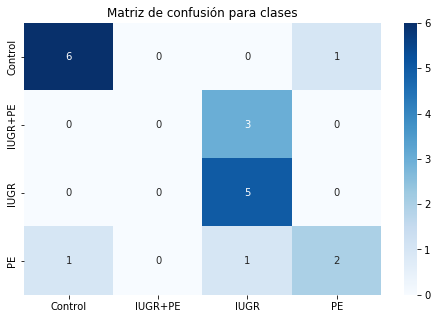

In [2038]:
y_pred_dec=class_decode(y_pred)
fig, ax = plt.subplots(figsize=(8, 5))
class_names= y_test.unique()
c_matrix = confusion_matrix(y_test,y_pred_dec)
graph= sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
bottom, top = graph.get_ylim()
plt.title("Matriz de confusión para clases")
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [2032]:
extra_tree.feature_importances_

array([0.01077038, 0.00655617, 0.01022738, 0.02305223, 0.06112818,
       0.01269697, 0.03106073, 0.10356647, 0.00964107, 0.09683166,
       0.07000545, 0.10408847, 0.28874201, 0.13705501, 0.00567113,
       0.01198426, 0.00090406, 0.01601838])

In [2033]:
data={'Variable':X_train_prec.columns, 'Importancia':extra_tree.feature_importances_}
df_importances = pd.DataFrame(data, columns = ['Variable', 'Importancia'])
df_importances.sort_values('Importancia', axis=0, ascending=False,
inplace=True, kind='quicksort', na_position='last')

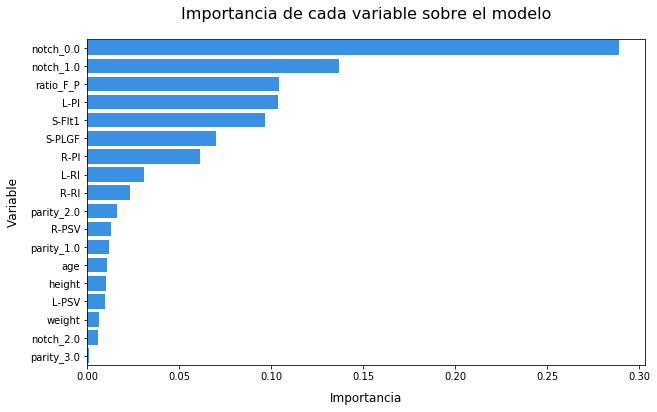

In [2034]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Importancia', y='Variable', data=df_importances, color= 'dodgerblue')
ax.set_ylabel('Variable', fontsize=12, labelpad=10)
ax.set_xlabel('Importancia', fontsize=12, labelpad=10)
ax.set_title('Importancia de cada variable sobre el modelo', fontsize=16, loc='center', pad=20)
plt.show()


### Fuentes bibliográficas  


<div class="csl-entry"><a name='data'>[1]</a> Premru-Srsen, T., &#38; Tanja Premru-Srsen, T. (2018). <i>Uterine arteries Doppler and sFlt-1/PlGF ratio in hypertensive disorders during pregnancy</i>. <i>1</i>. https://doi.org/10.17632/ZSJHVY9YTX.1</div>  

<br></br>
<div class="csl-entry"><a name='paper'>[2]</a>V, F.-V., K, K., J, O., I, V., K, G., &#38; T, P.-S. (2019). Correlation between uterine artery Doppler and the sFlt-1/PlGF ratio in different phenotypes of placental dysfunction. <i>Hypertension in Pregnancy</i>, <i>38</i>(1), 32–40. https://doi.org/10.1080/10641955.2018.1550579 </div>

------